In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv('./data_set.csv')
df1=pd.read_csv('./data_set.csv')
dates=['Date','Date2','Date3','Date4','Date5']
Dex = ['dext','dexp','dexRc','dexgw']
discharge = ['Trinity_dicharge']
GMWL= ['GMWL']
isotopes= ['18Ot','2Ht','18Op','2Hp','18ORc','2HRc','18Ogw','2Hgw']
dropped=pd.concat([df[dates],df[Dex],df[discharge],df[GMWL]], axis=1)
iso_data=df.drop(columns=dropped)
dropped1=pd.concat([df[dates],df[isotopes],df[discharge],df[GMWL]], axis=1)
dex_data=df.drop(columns=dropped1)
data_rushcreek= pd.read_csv('./dataset_RC.csv')
data_precipi=pd.read_csv('./dataset_Precipitation.csv')
data_gw=pd.read_csv('./GW_dataset.csv')

C:\Users\jsc8450\AppData\Local\Temp\ipykernel_17080\980044209.py:1: DtypeWarning: Columns (0,4,8,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('./data_set.csv')
C:\Users\jsc8450\AppData\Local\Temp\ipykernel_17080\980044209.py:2: DtypeWarning: Columns (0,4,8,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv('./data_set.csv')


In [3]:
iso_data=iso_data.reset_index(drop=True)
iso_data

18Ot   2Ht  18Op    2Hp  18ORc   2HRc  18Ogw   2Hgw
0      0.28  0.07  -8.9 -49.80  -3.50 -24.22  -5.27 -29.85
1      0.44  0.90  -9.7 -57.41  -3.51 -21.09  -6.09 -36.61
2      0.52  1.12  -8.9 -47.82  -3.15 -15.31  -5.17 -30.84
3      0.40 -0.07 -10.5 -61.74  -3.55 -19.45  -5.00 -28.73
4      0.67  2.08 -11.8 -72.16  -2.82 -13.69  -4.77 -27.85
...     ...   ...   ...    ...    ...    ...    ...    ...
36915   NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN
36916   NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN
36917   NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN
36918   NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN
36919   NaN   NaN   NaN    NaN    NaN    NaN    NaN    NaN

[36920 rows x 8 columns]

In [4]:
o18_iso_data=iso_data.drop(['2Ht','2Hp','2HRc','2Hgw'], axis=1)

In [5]:
o18_iso_data=o18_iso_data.reset_index(drop=True)

In [6]:
o18_iso_data

18Ot  18Op  18ORc  18Ogw
0      0.28  -8.9  -3.50  -5.27
1      0.44  -9.7  -3.51  -6.09
2      0.52  -8.9  -3.15  -5.17
3      0.40 -10.5  -3.55  -5.00
4      0.67 -11.8  -2.82  -4.77
...     ...   ...    ...    ...
36915   NaN   NaN    NaN    NaN
36916   NaN   NaN    NaN    NaN
36917   NaN   NaN    NaN    NaN
36918   NaN   NaN    NaN    NaN
36919   NaN   NaN    NaN    NaN

[36920 rows x 4 columns]

<AxesSubplot:>

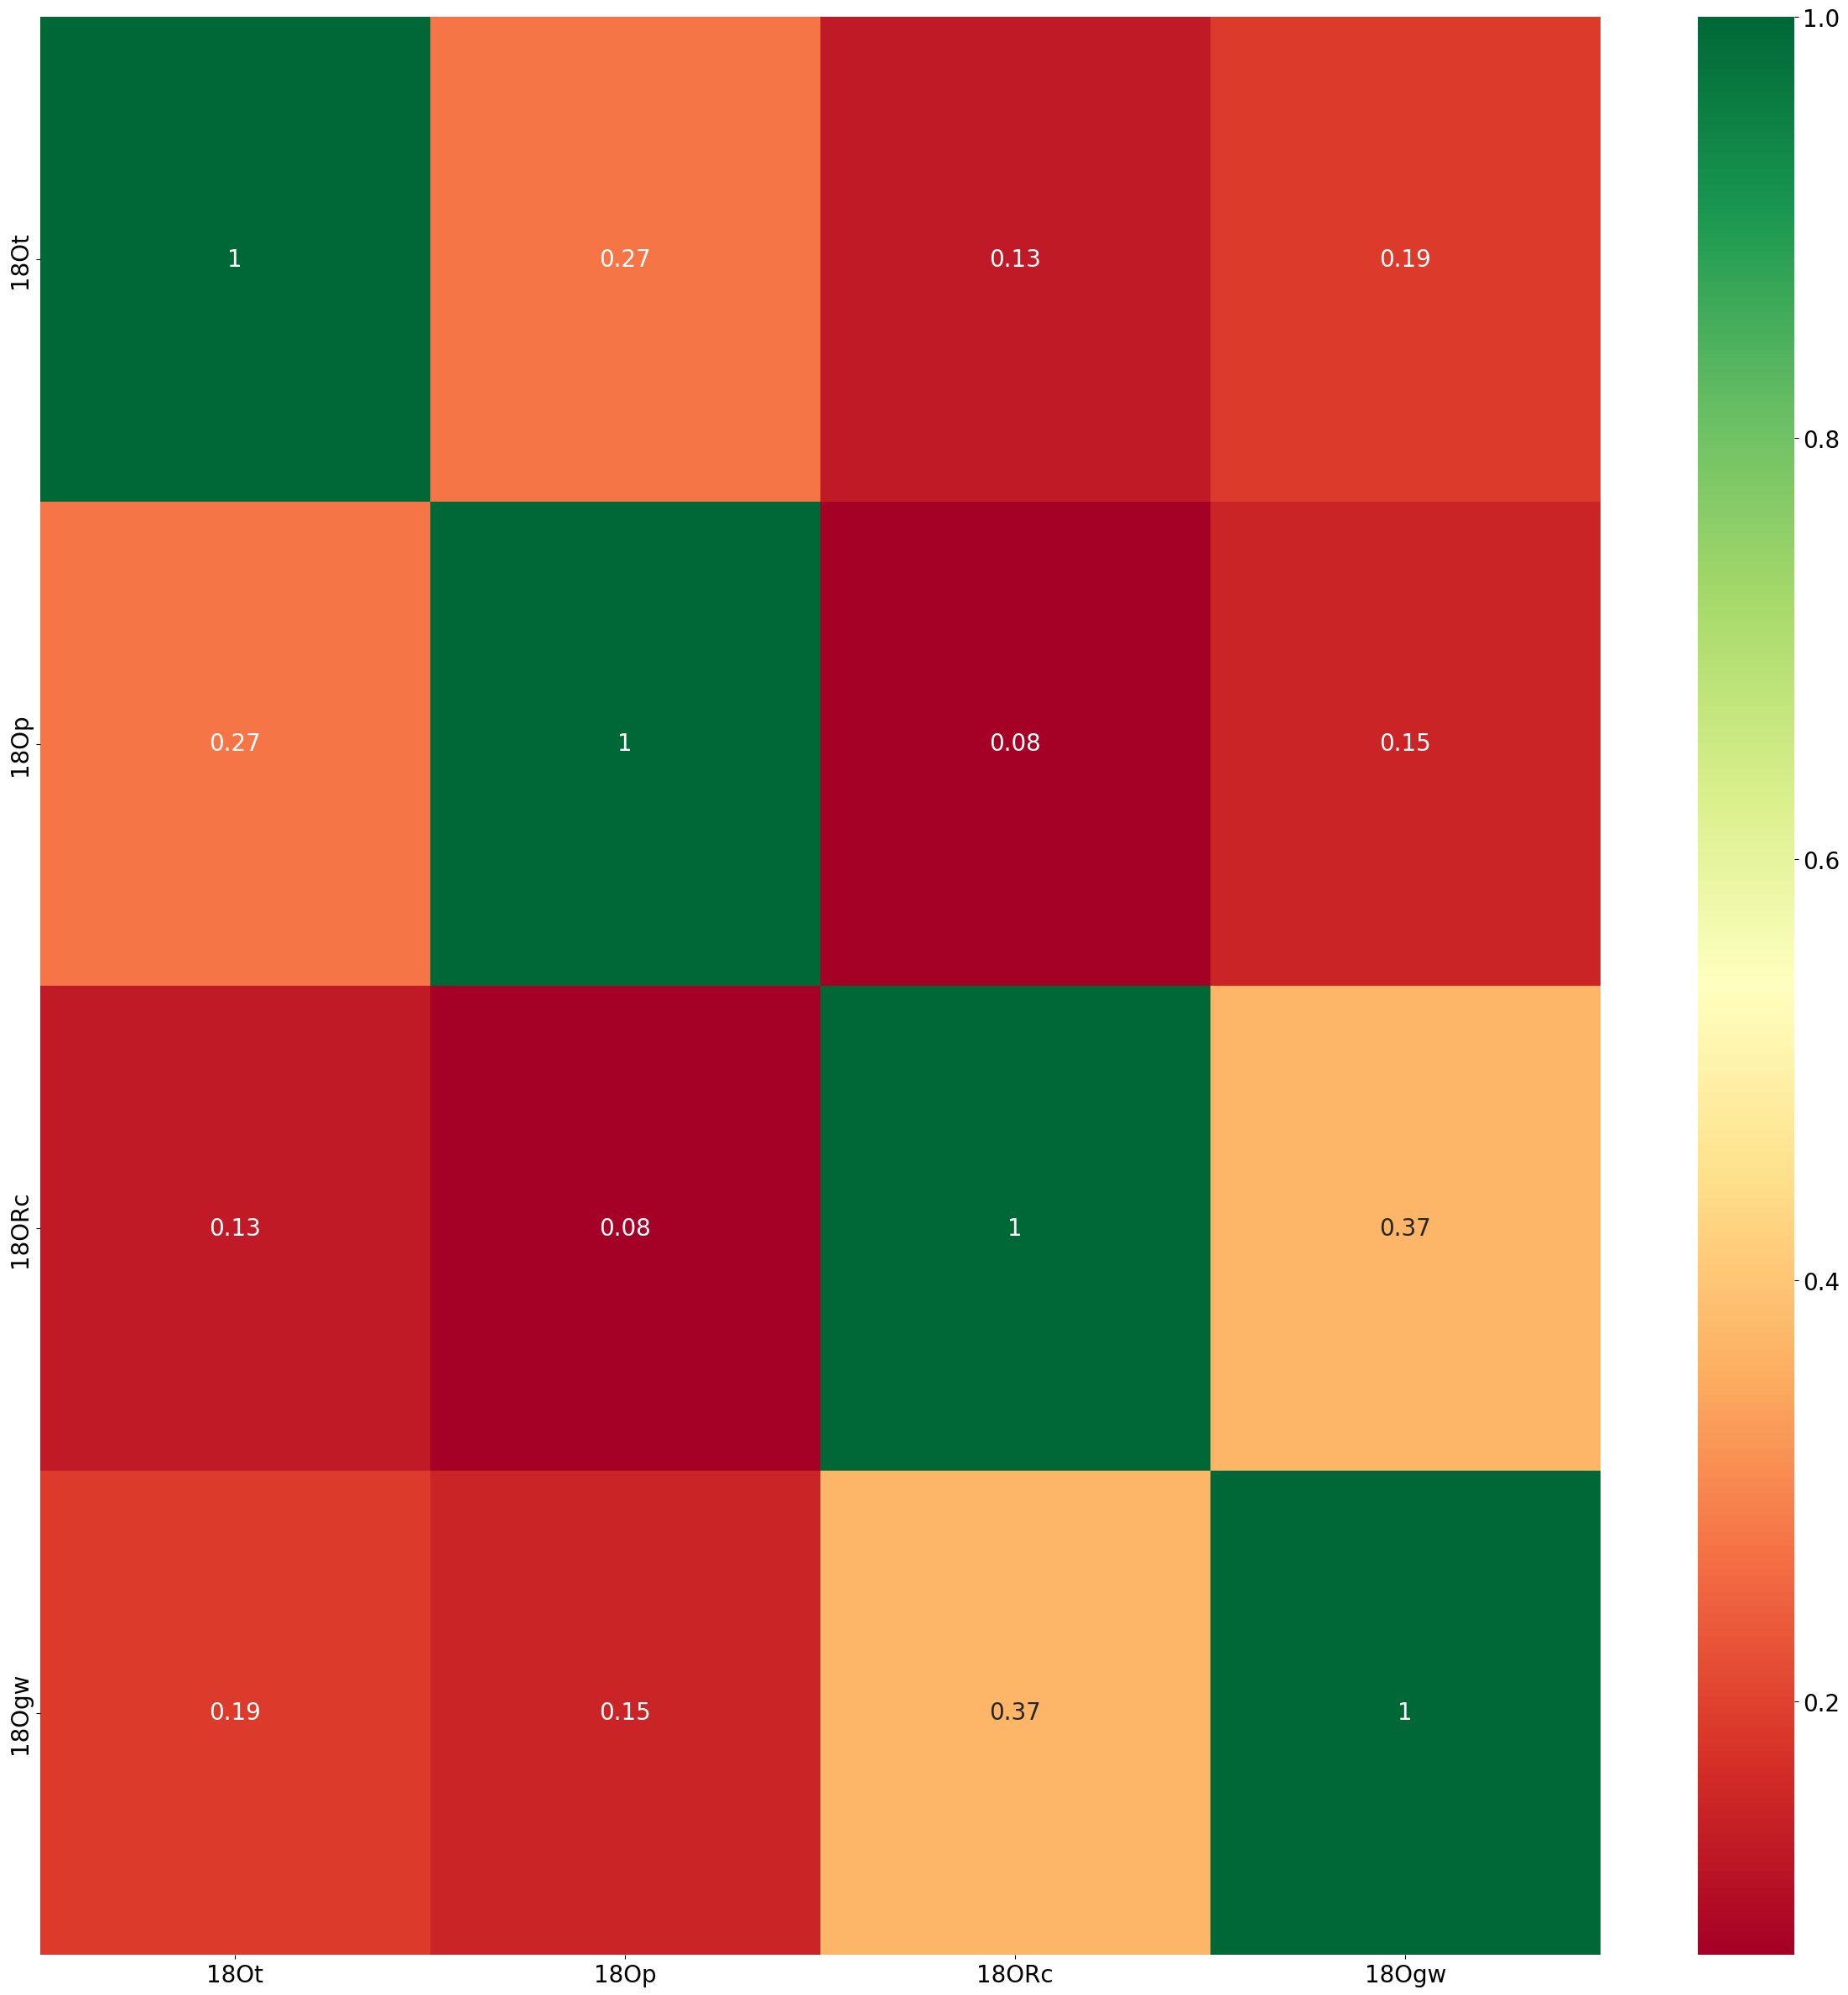

In [7]:
corre_ma = o18_iso_data.corr()
top_corr_featuresdf = corre_ma.index
plt.figure(figsize=(30,30))
plt.rcParams['font.size'] = 20
sns.heatmap(o18_iso_data[top_corr_featuresdf].corr(),annot=True,cmap="RdYlGn",) 

In [8]:
iso_data.describe()

18Ot        2Ht        18Op         2Hp       18ORc        2HRc  \
count  61.000000  61.000000  163.000000  163.000000  135.000000  135.000000   
mean   -2.342131 -15.995574   -5.360920  -33.077362   -4.251852  -24.866593   
std     2.515237  13.605157    4.959151   37.135721    2.205112   15.744831   
min    -7.950000 -51.660000  -21.470000 -159.050000  -12.710000  -86.690000   
25%    -4.100000 -22.580000   -7.610000  -47.430000   -5.470000  -31.365000   
50%    -2.140000 -15.680000   -4.390000  -24.070000   -3.730000  -20.970000   
75%    -0.020000  -6.940000   -2.210000  -10.585000   -2.835000  -14.345000   
max     1.680000  10.310000    4.740000   23.240000    0.210000    3.690000   

           18Ogw       2Hgw  
count  11.000000  11.000000  
mean   -5.563636 -32.942727  
std     0.619052   4.396228  
min    -6.330000 -38.940000  
25%    -6.090000 -36.685000  
50%    -5.360000 -30.840000  
75%    -5.085000 -29.290000  
max    -4.750000 -27.850000

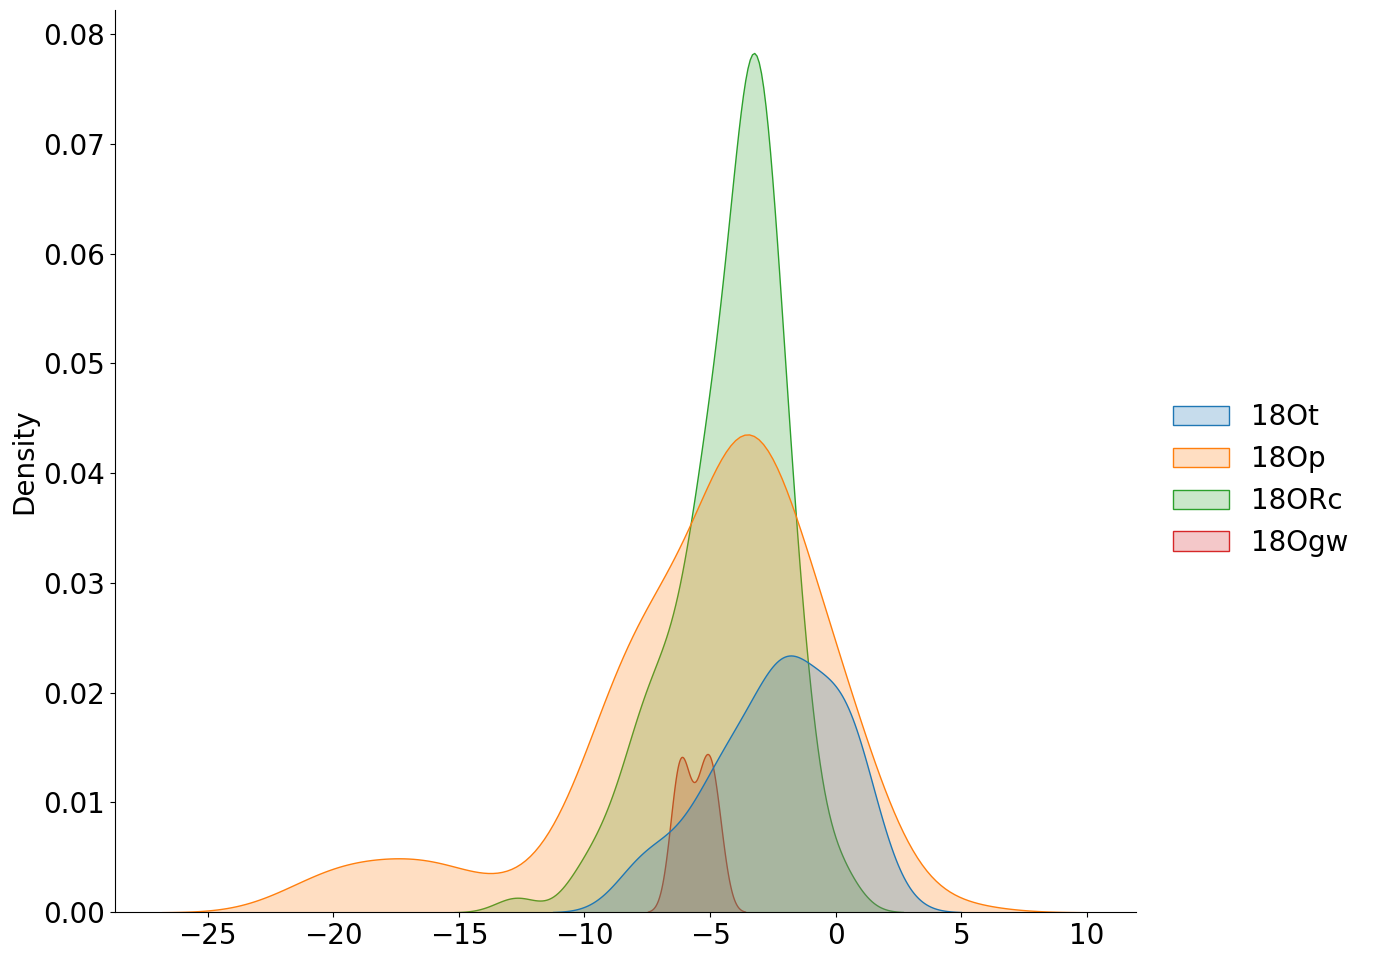

In [9]:
sns.displot(o18_iso_data, kind="kde", height=10, aspect=1.2, fill=True)
#sns.displot(iso_data, kind="kde", height=9, aspect=1.5, fill=True)


<AxesSubplot:>

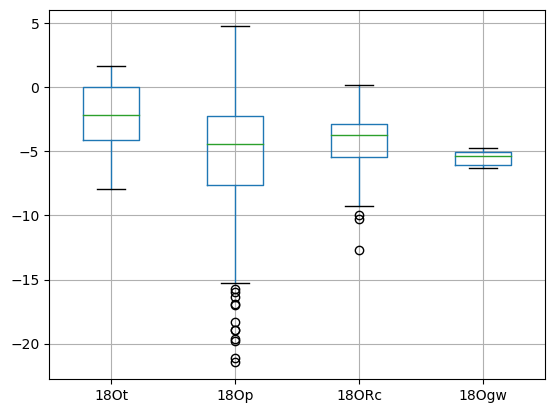

In [10]:
o18_iso_data.boxplot(fontsize=10)


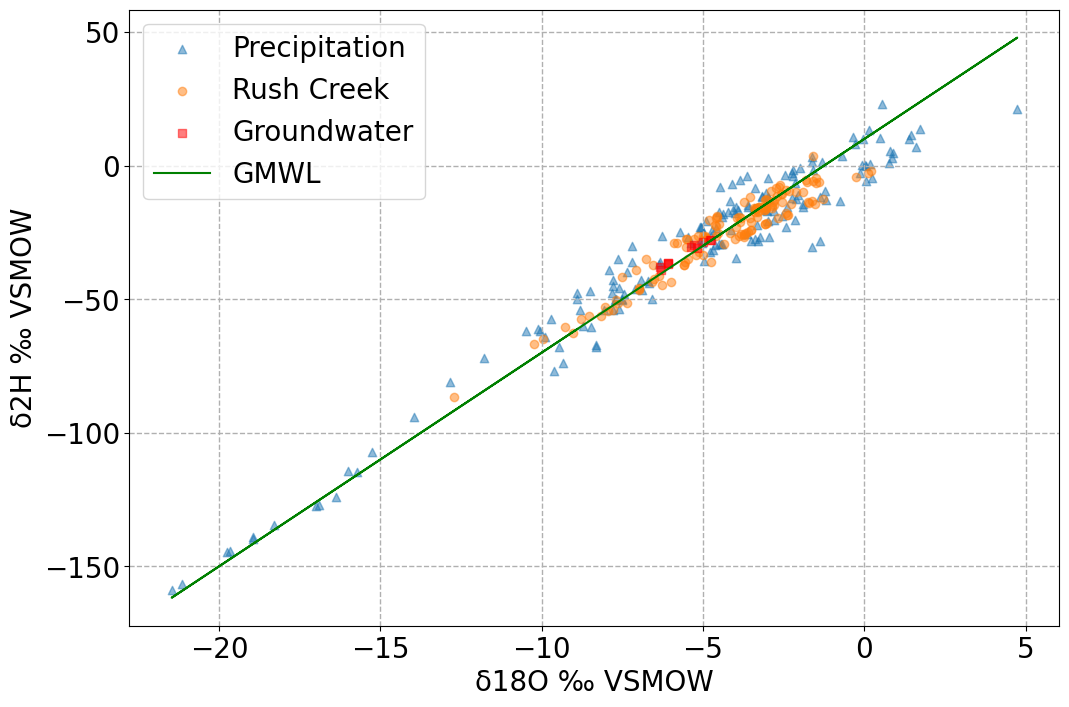

In [11]:
fig, ax1 = plt.subplots(figsize=(12,8))

#ax1.scatter(iso_data['18Ot'],iso_data['2Ht'],marker='^',alpha=0.9,label='Trinity River')

ax1.scatter(iso_data['18Op'],iso_data['2Hp'],marker='^',alpha=0.5,label='Precipitation')

ax1.scatter(iso_data['18ORc'],iso_data['2HRc'],marker='o',alpha=0.5,label='Rush Creek')

ax1.scatter(iso_data['18Ogw'],iso_data['2Hgw'],marker='s',alpha=0.5,label='Groundwater',c="red")

ax1.plot(iso_data['18Op'],df['GMWL'],label='GMWL',color='green')
ax1.set_xlabel('δ18O ‰ VSMOW')
ax1.set_ylabel('δ2H ‰ VSMOW')
plt.grid( linestyle = '--', linewidth = 1)
plt.legend()

In [12]:
data_rushcreek

Date3  18ORc   2HRc  dexRc
0    3/21/2022  -3.50 -24.22   3.80
1    3/21/2022  -3.51 -21.09   7.02
2    3/22/2022  -3.15 -15.31   9.92
3    3/23/2022  -3.55 -19.45   8.94
4    3/30/2022  -2.82 -13.69   8.87
..         ...    ...    ...    ...
130  2/14/2023  -3.73 -13.74  16.07
131  2/16/2023  -3.53 -11.58  16.66
132  2/21/2023  -1.48  -4.45   7.41
133   3/1/2023  -1.60   3.69  16.50
134   3/3/2023  -4.94 -26.55  12.99

[135 rows x 4 columns]

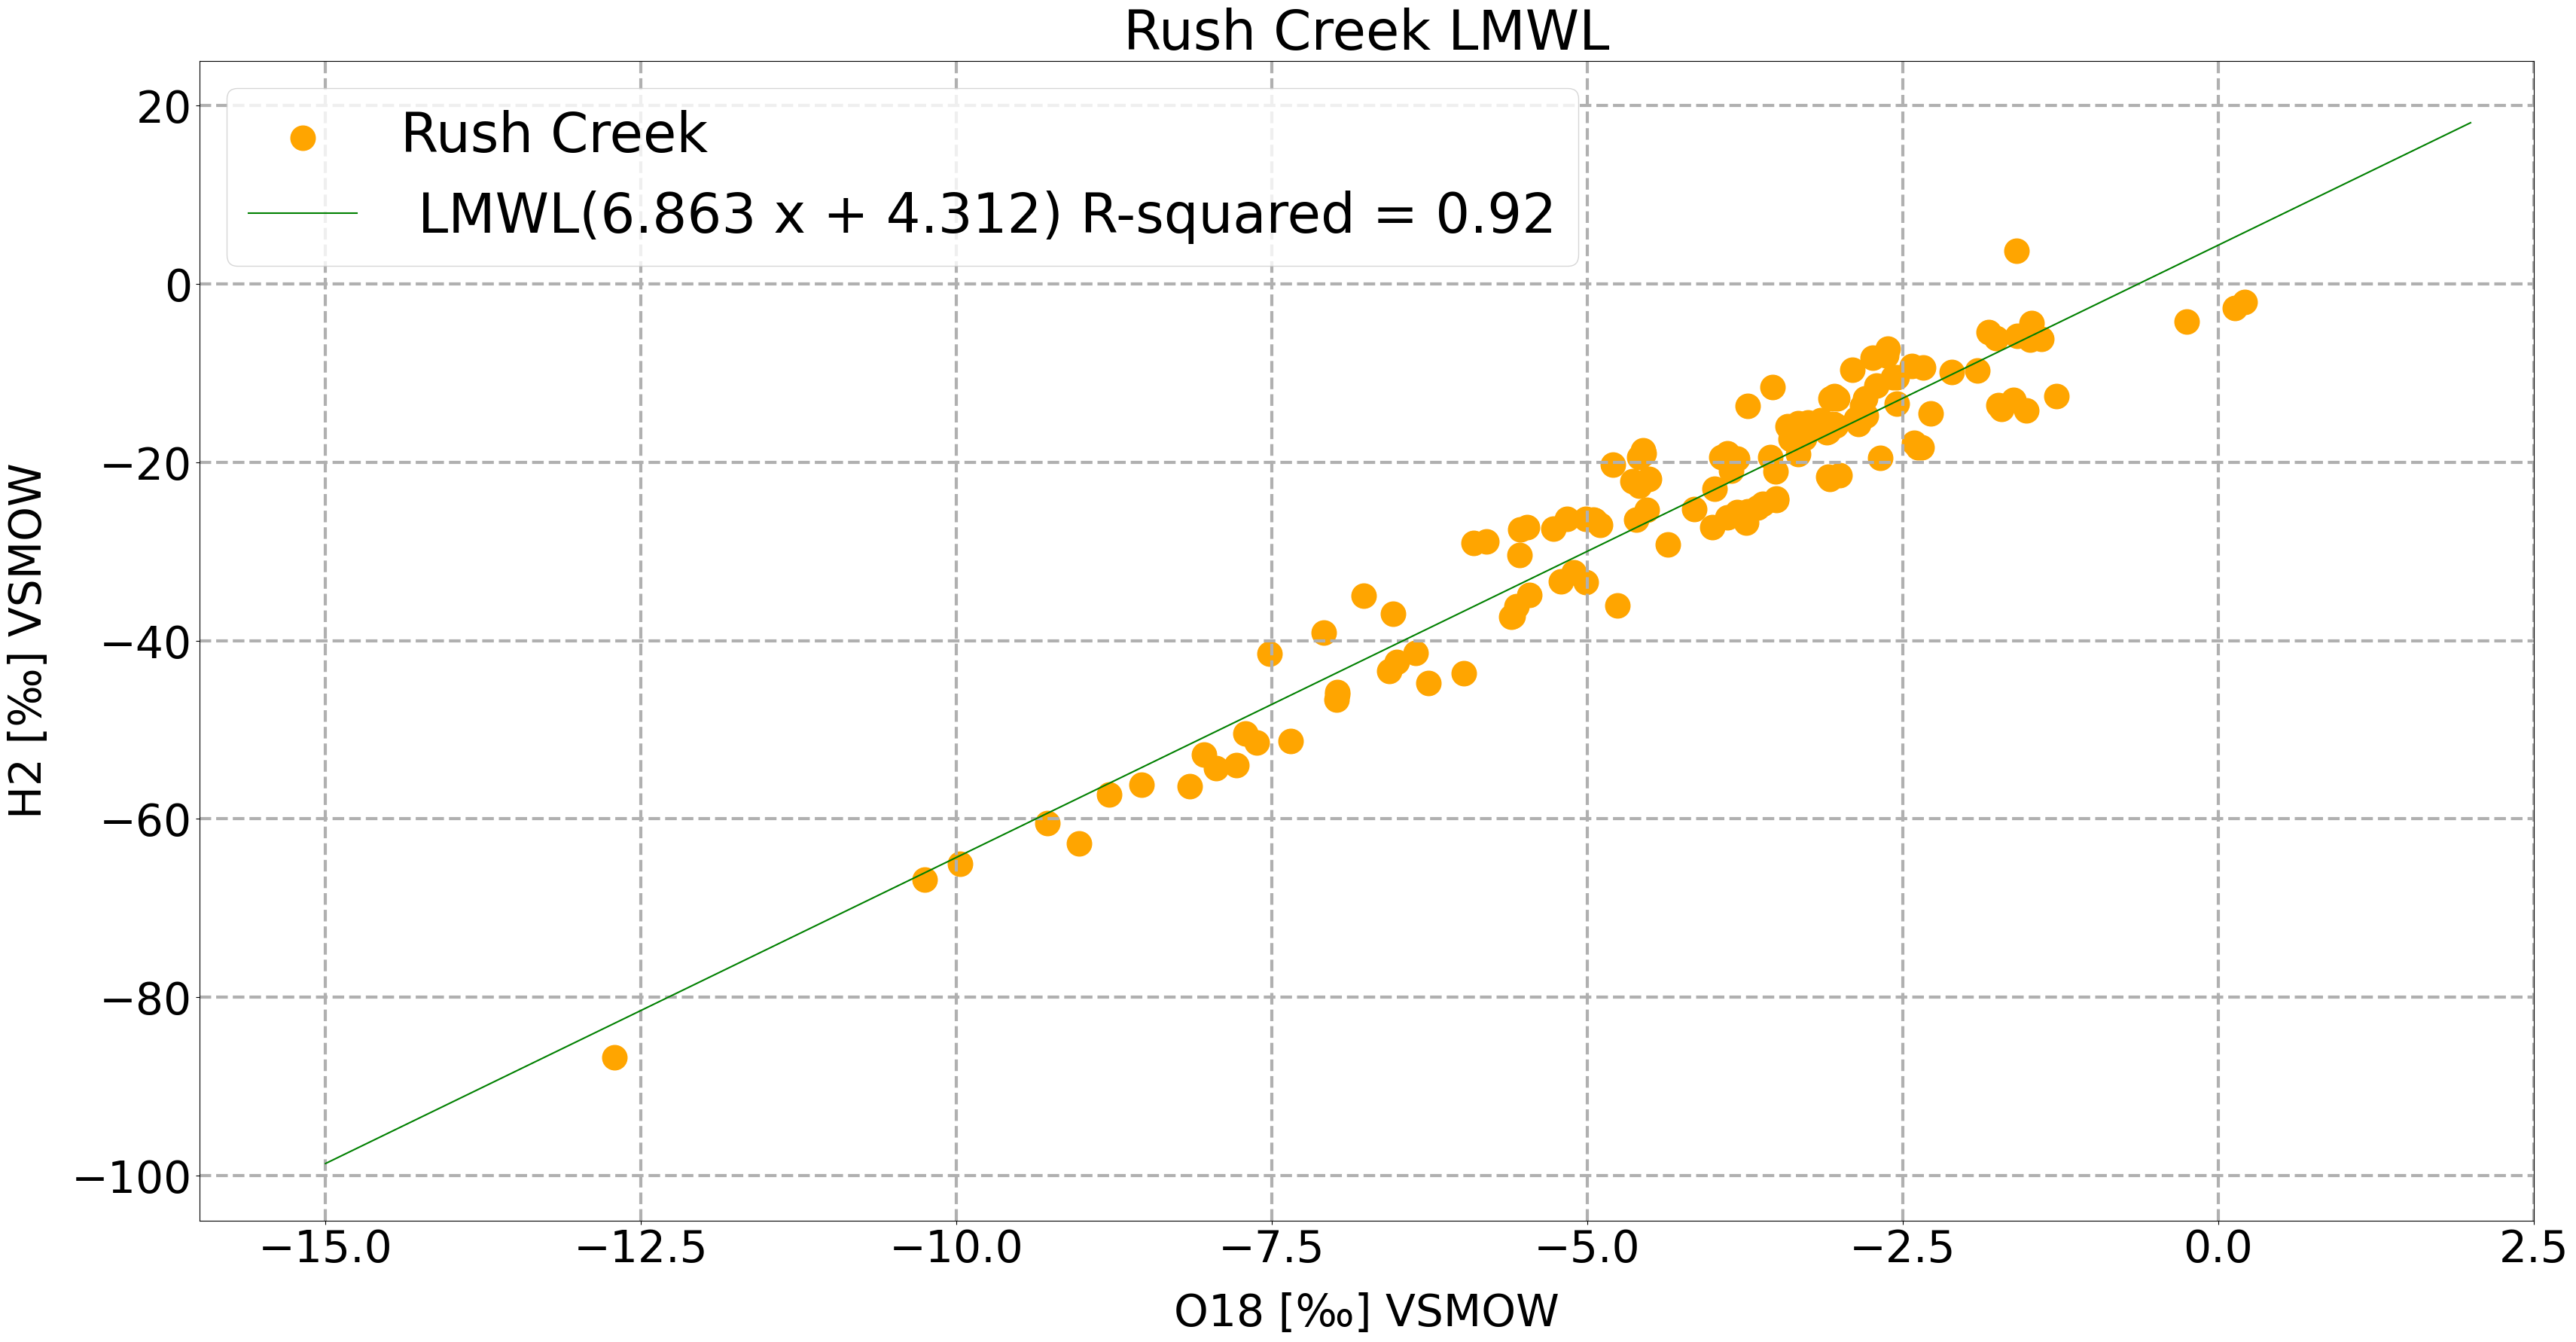

0.9237525349561395


In [13]:
plt.rcParams.update({'font.size': 42})
plt.figure(figsize=(40,20))
plt.scatter(iso_data['18ORc'],iso_data['2HRc'],marker='o',alpha=1,label='Rush Creek',s=550,c="orange")
model1 = np.poly1d(np.polyfit(data_rushcreek['18ORc'],data_rushcreek['2HRc'], 1))
polyline = np.linspace(-15, 2, 30)
plt.plot(polyline, model1(polyline), color='green', label= ' LMWL(6.863 x + 4.312) R-squared = 0.92')
#plt.plot(O18, GMWL,linestyle = '--', color='red',label ='GMWL')
plt.axis([-16,2.5,-105,25])
plt.xlabel('O18 [‰] VSMOW', fontsize = 42,labelpad = 20)
plt.ylabel('H2 [‰] VSMOW', fontsize = 42, labelpad = 20)
plt.grid( linestyle = '--', linewidth = 3)
plt.title(' Rush Creek LMWL ', fontsize = 52)
plt.legend(loc='upper left',fontsize = 52)
r2_score(data_rushcreek['2HRc'],data_rushcreek['18ORc'])
plt.show()
print(r2_score(data_rushcreek['2HRc'],model1(data_rushcreek['18ORc'])))


In [14]:
data_precipi= data_precipi.dropna()
data_precipi

Date   18Op    2Hp   dexp  P (mm)
0    1/24/2022  -8.90 -49.80  21.10    5.65
1     2/2/2022  -9.70 -57.41  20.30    3.77
2     2/2/2022  -8.90 -47.82  23.50    3.77
3     2/2/2022 -10.50 -61.74  22.10    2.26
4     2/2/2022 -11.80 -72.16  22.10    3.39
..         ...    ...    ...    ...     ...
158   3/1/2023   0.19   0.50  -1.00    5.60
159   3/1/2023  -4.98 -35.53   4.32    9.90
160   3/2/2023  -3.61 -15.63  13.22   16.90
161   3/3/2023  -6.32 -35.91  14.62   15.70
162   3/3/2023  -4.61 -23.40  13.50   35.60

[163 rows x 5 columns]

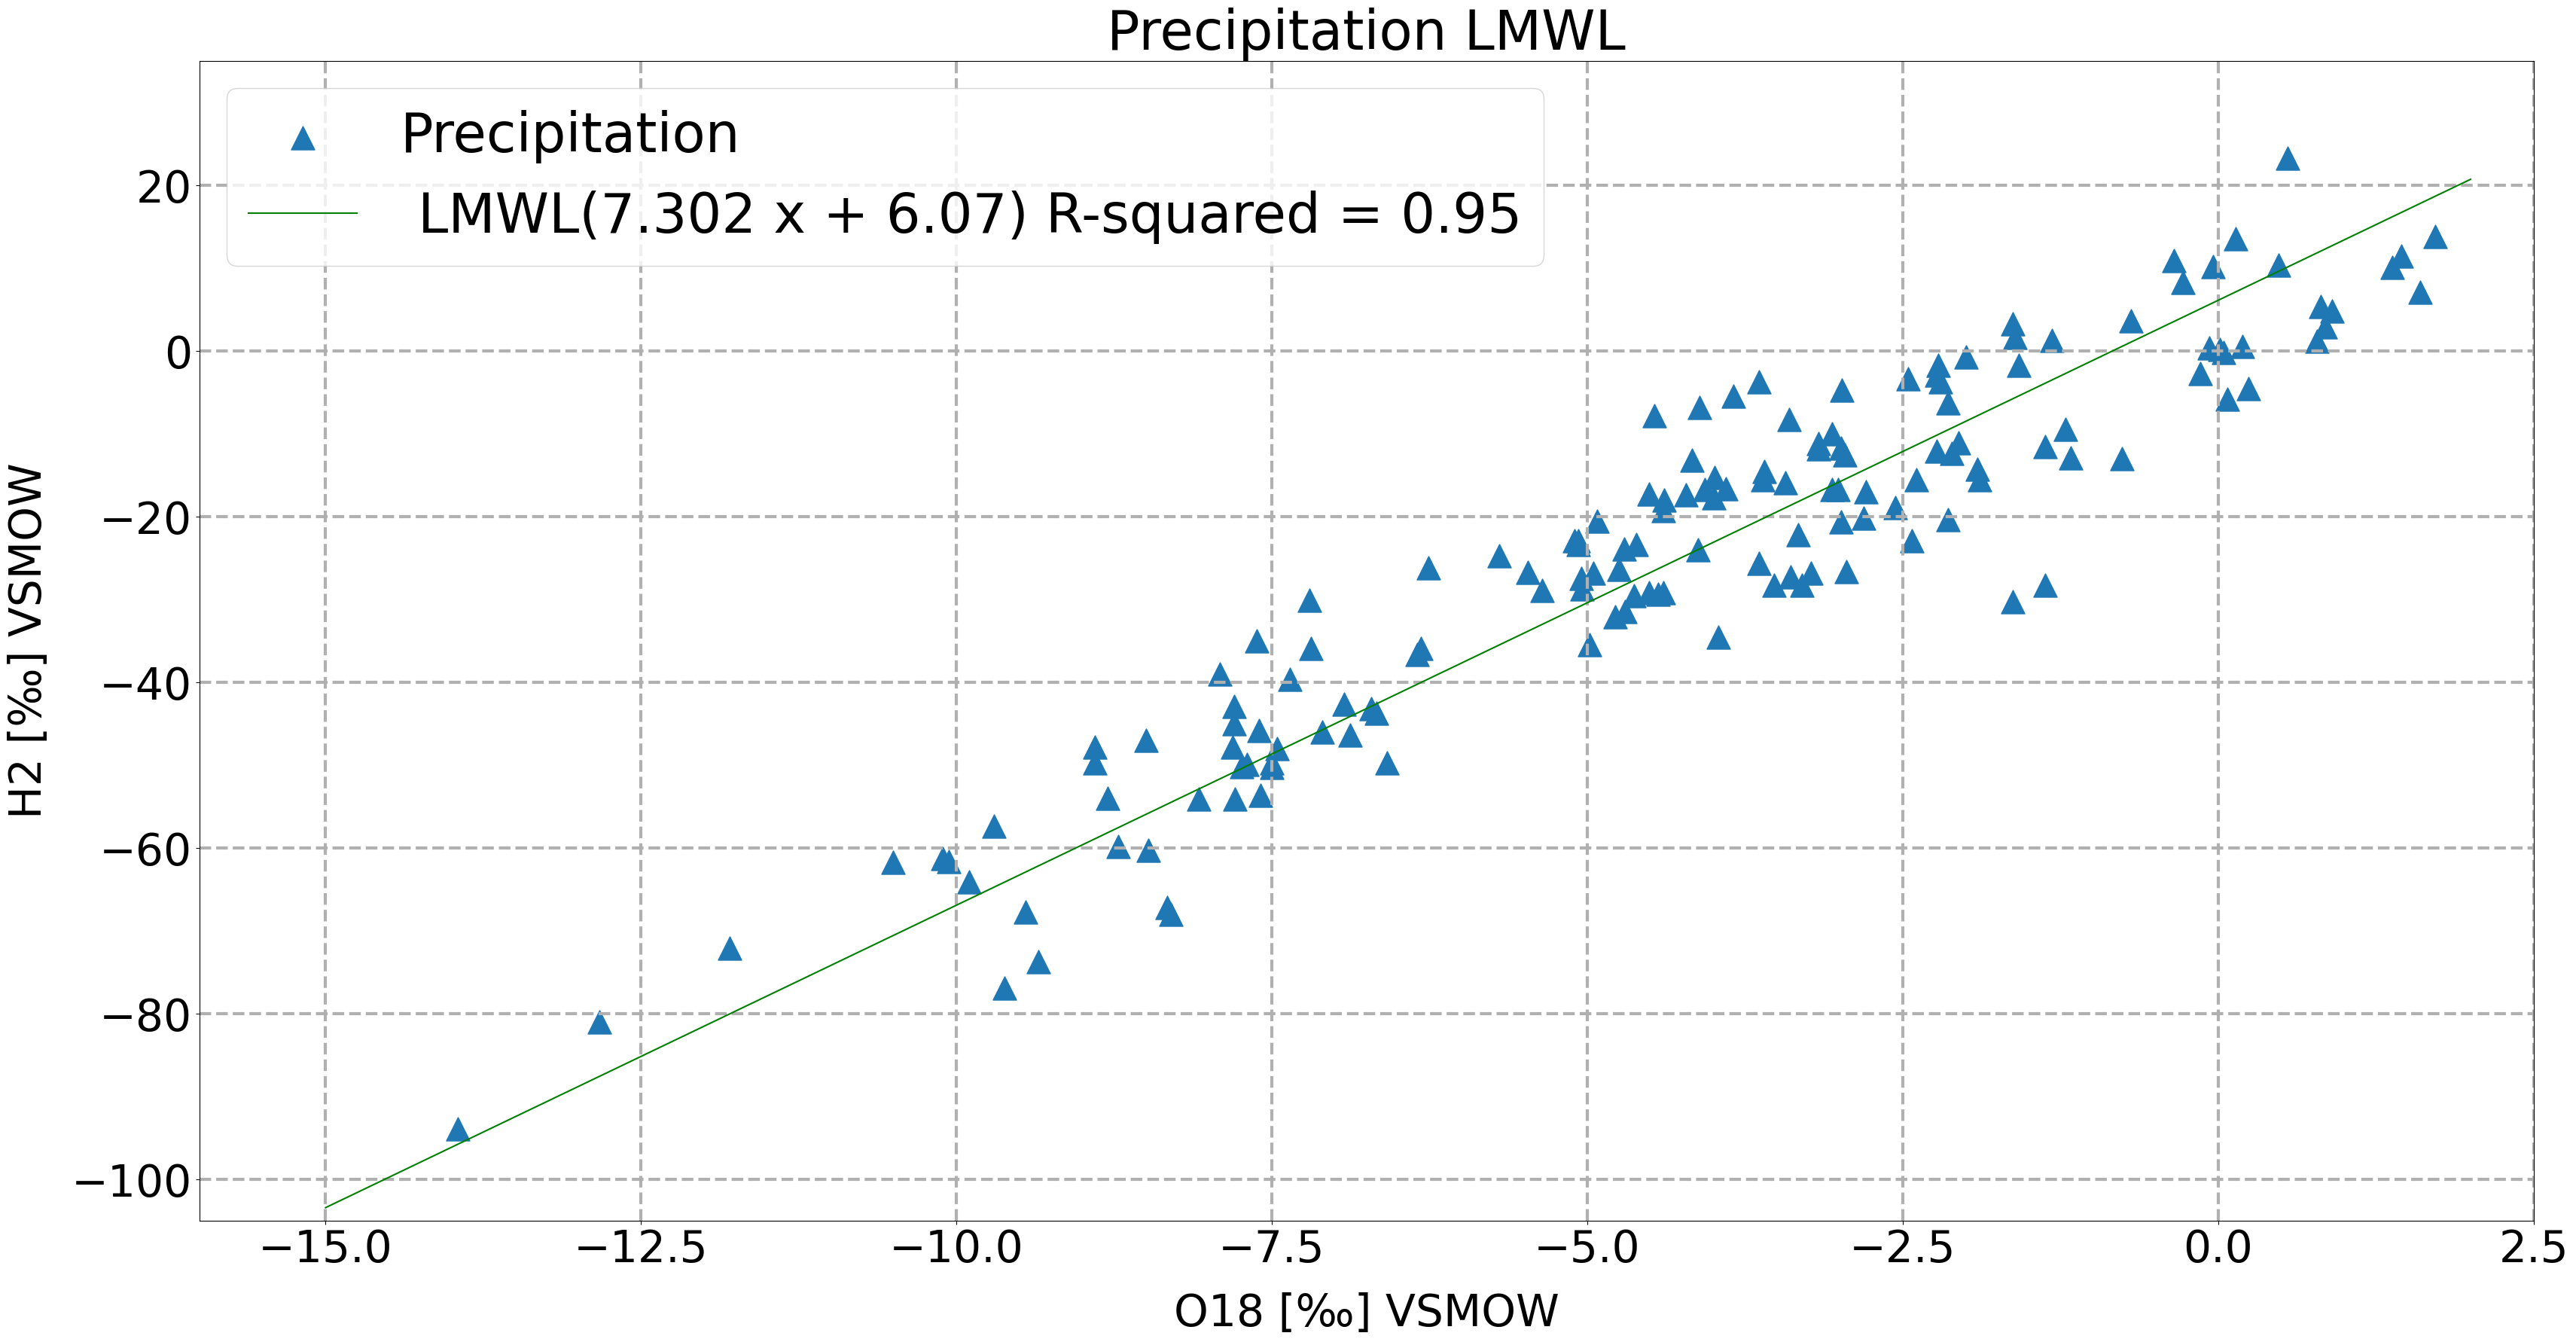

0.9509547553957044


In [15]:
plt.rcParams.update({'font.size': 42})
plt.figure(figsize=(40,20))
plt.scatter(data_precipi['18Op'],data_precipi['2Hp'],marker='^',alpha=1,label='Precipitation',s=500)
modelp = np.poly1d(np.polyfit(data_precipi['18Op'],data_precipi['2Hp'], 1))
polyline = np.linspace(-15, 2, 30)
plt.plot(polyline, modelp(polyline), color='green', label= ' LMWL(7.302 x + 6.07) R-squared = 0.95')
#plt.plot(O18, GMWL,linestyle = '--', color='red',label ='GMWL')
plt.axis([-16,2.5,-105,35])
plt.xlabel('O18 [‰] VSMOW', fontsize = 42,labelpad = 20)
plt.ylabel('H2 [‰] VSMOW', fontsize = 42, labelpad = 20)
plt.grid( linestyle = '--', linewidth = 3)
plt.title(' Precipitation LMWL ', fontsize = 52)
plt.legend(loc='upper left',fontsize = 52)
plt.show()
print(r2_score(data_precipi['2Hp'],modelp(data_precipi['18Op'])))

In [16]:
data_gw

Date5  18Ogw   2Hgw  dexgw
0    6/8/2022  -5.27 -29.85  12.29
1   6/22/2022  -6.09 -36.61  12.11
2   6/17/2022  -5.17 -30.84  10.53
3   6/22/2022  -5.00 -28.73  11.27
4   6/21/2022  -4.77 -27.85  10.33
5   6/22/2022  -6.07 -36.76  11.79
6   6/21/2022  -4.75 -27.91  10.06
7   6/14/2022  -6.09 -36.57  12.16
8   6/23/2022  -6.30 -38.94  11.47
9   6/13/2022  -6.33 -38.04  12.56
10  6/10/2022  -5.36 -30.27  12.62

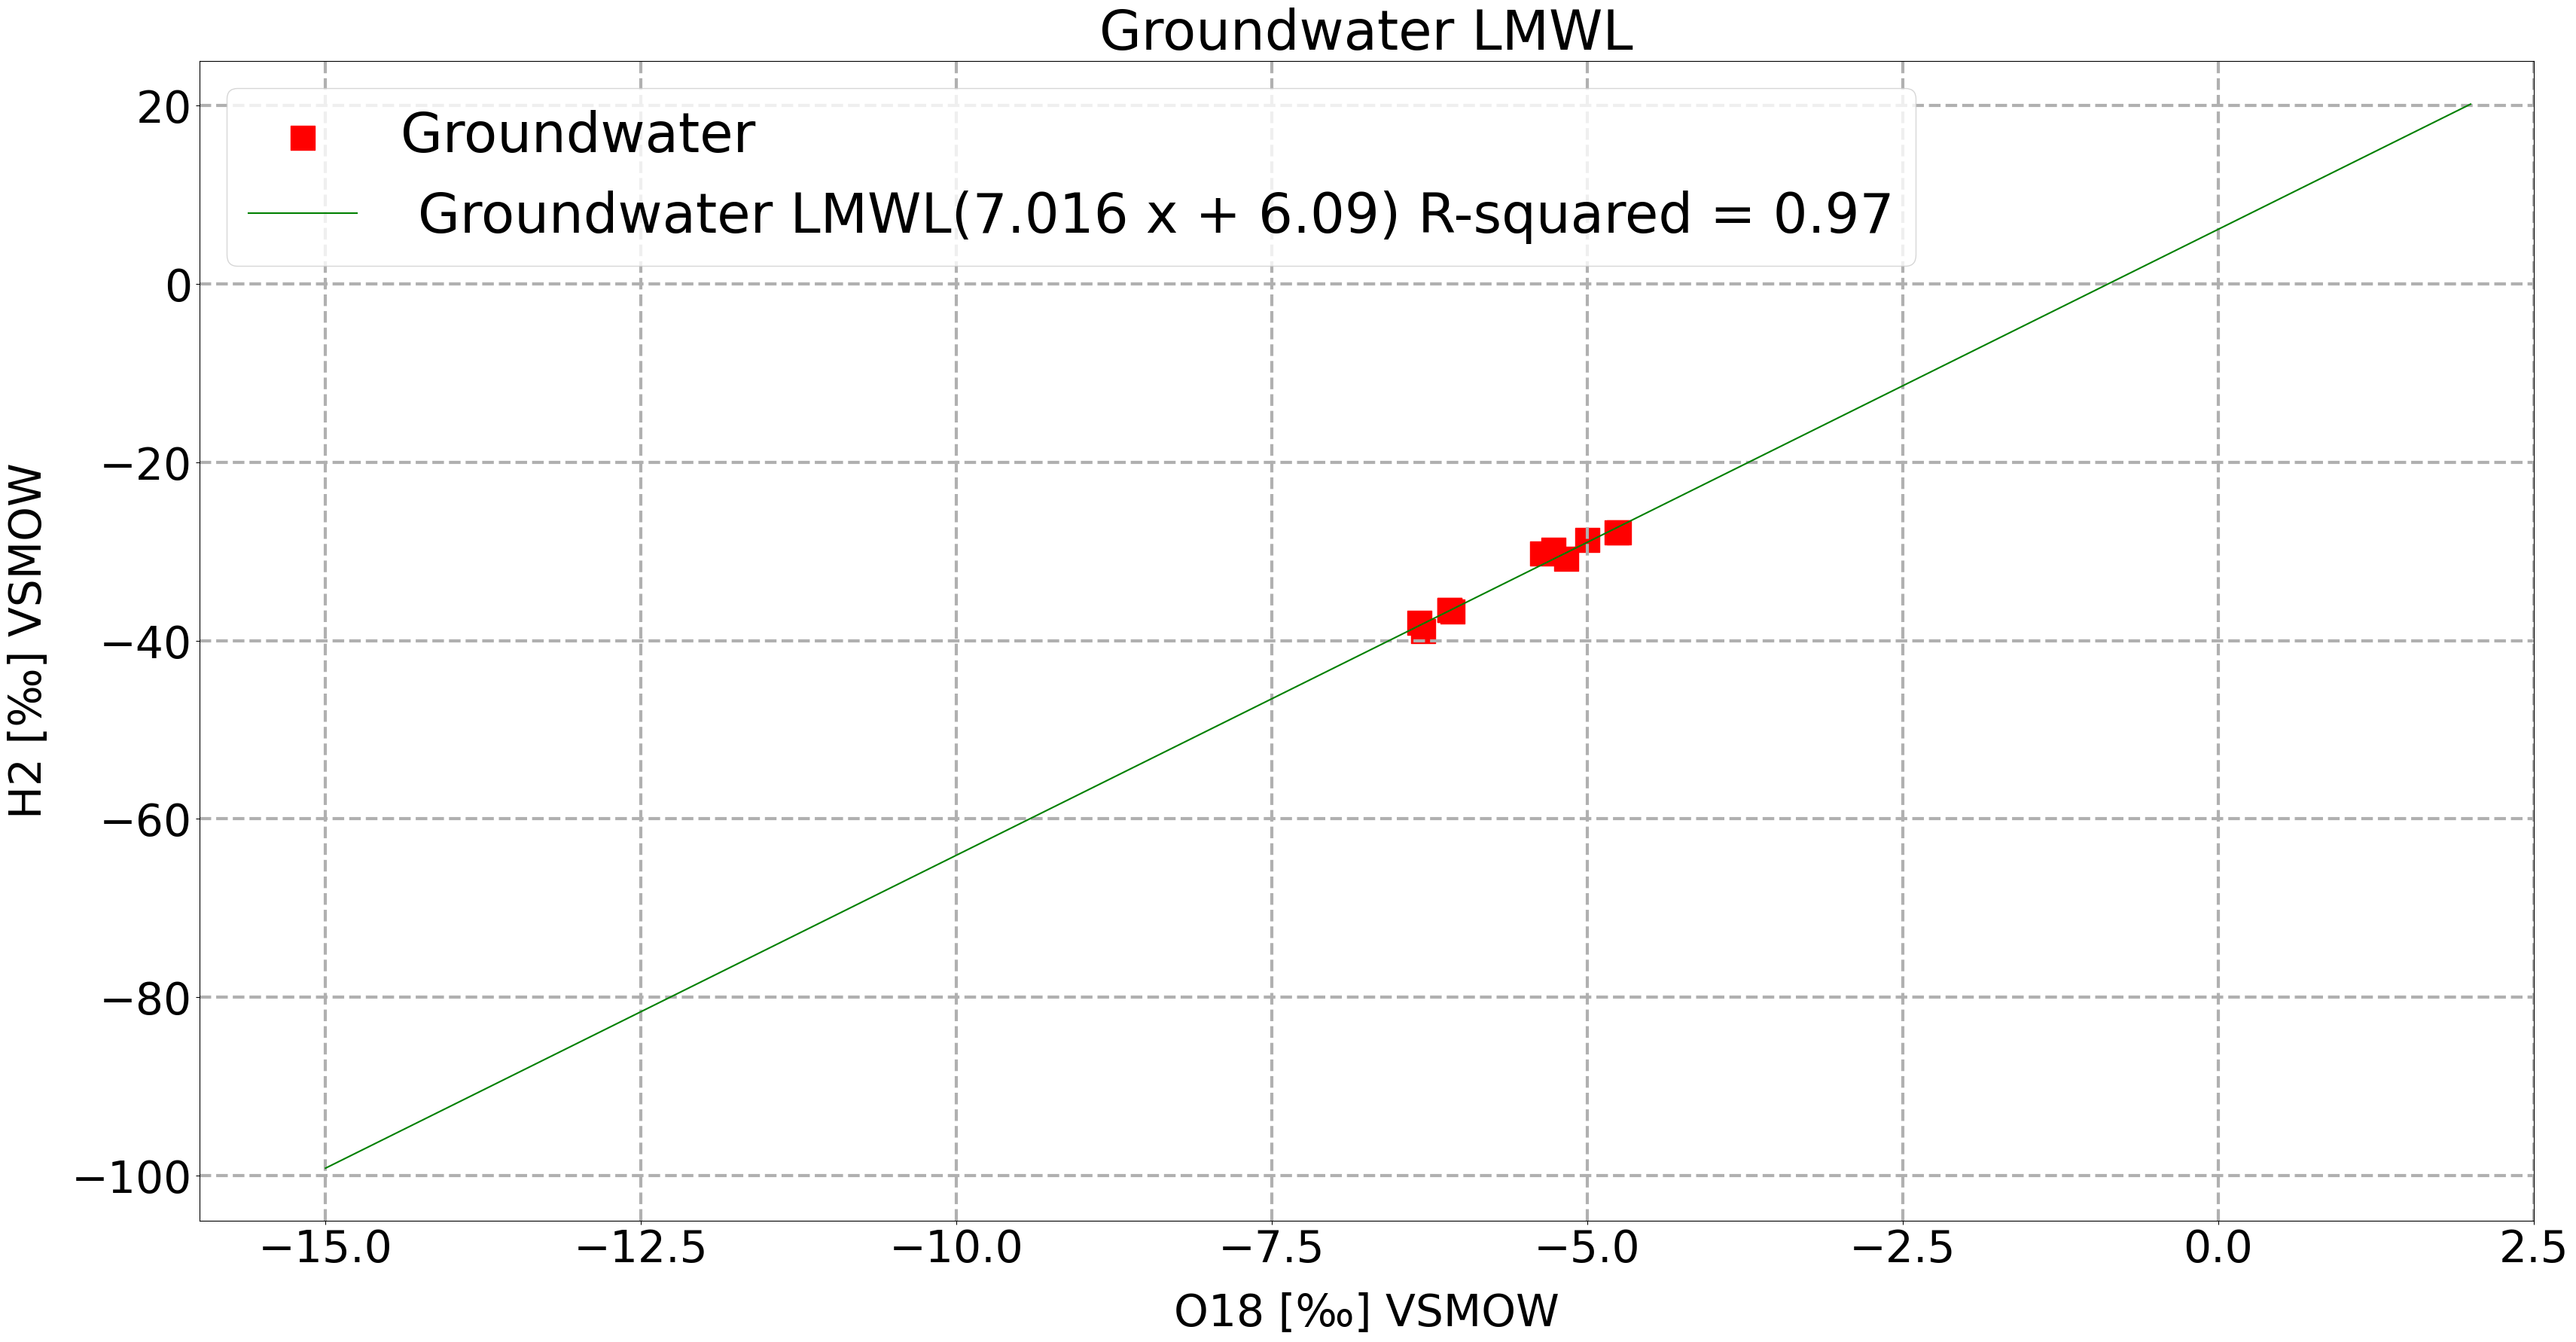

0.9759863987101556


In [17]:
plt.rcParams.update({'font.size': 42})
plt.figure(figsize=(40,20))
plt.scatter(iso_data['18Ogw'],iso_data['2Hgw'],marker='s',alpha=1,label='Groundwater',s=550,c="red")
modelgw = np.poly1d(np.polyfit(data_gw['18Ogw'],data_gw['2Hgw'], 1))
polyline = np.linspace(-15, 2, 30)
plt.plot(polyline, modelgw(polyline), color='green', label= ' Groundwater LMWL(7.016 x + 6.09) R-squared = 0.97')
#plt.plot(O18, GMWL,linestyle = '--', color='red',label ='GMWL')
plt.axis([-16,2.5,-105,25])
plt.xlabel('O18 [‰] VSMOW', fontsize = 42,labelpad = 20)
plt.ylabel('H2 [‰] VSMOW', fontsize = 42, labelpad = 20)
plt.grid( linestyle = '--', linewidth = 3)
plt.title(' Groundwater LMWL ', fontsize = 52)
plt.legend(loc='upper left',fontsize = 52)
plt.show()
print(r2_score(data_gw['2Hgw'],modelgw(data_gw['18Ogw'])))

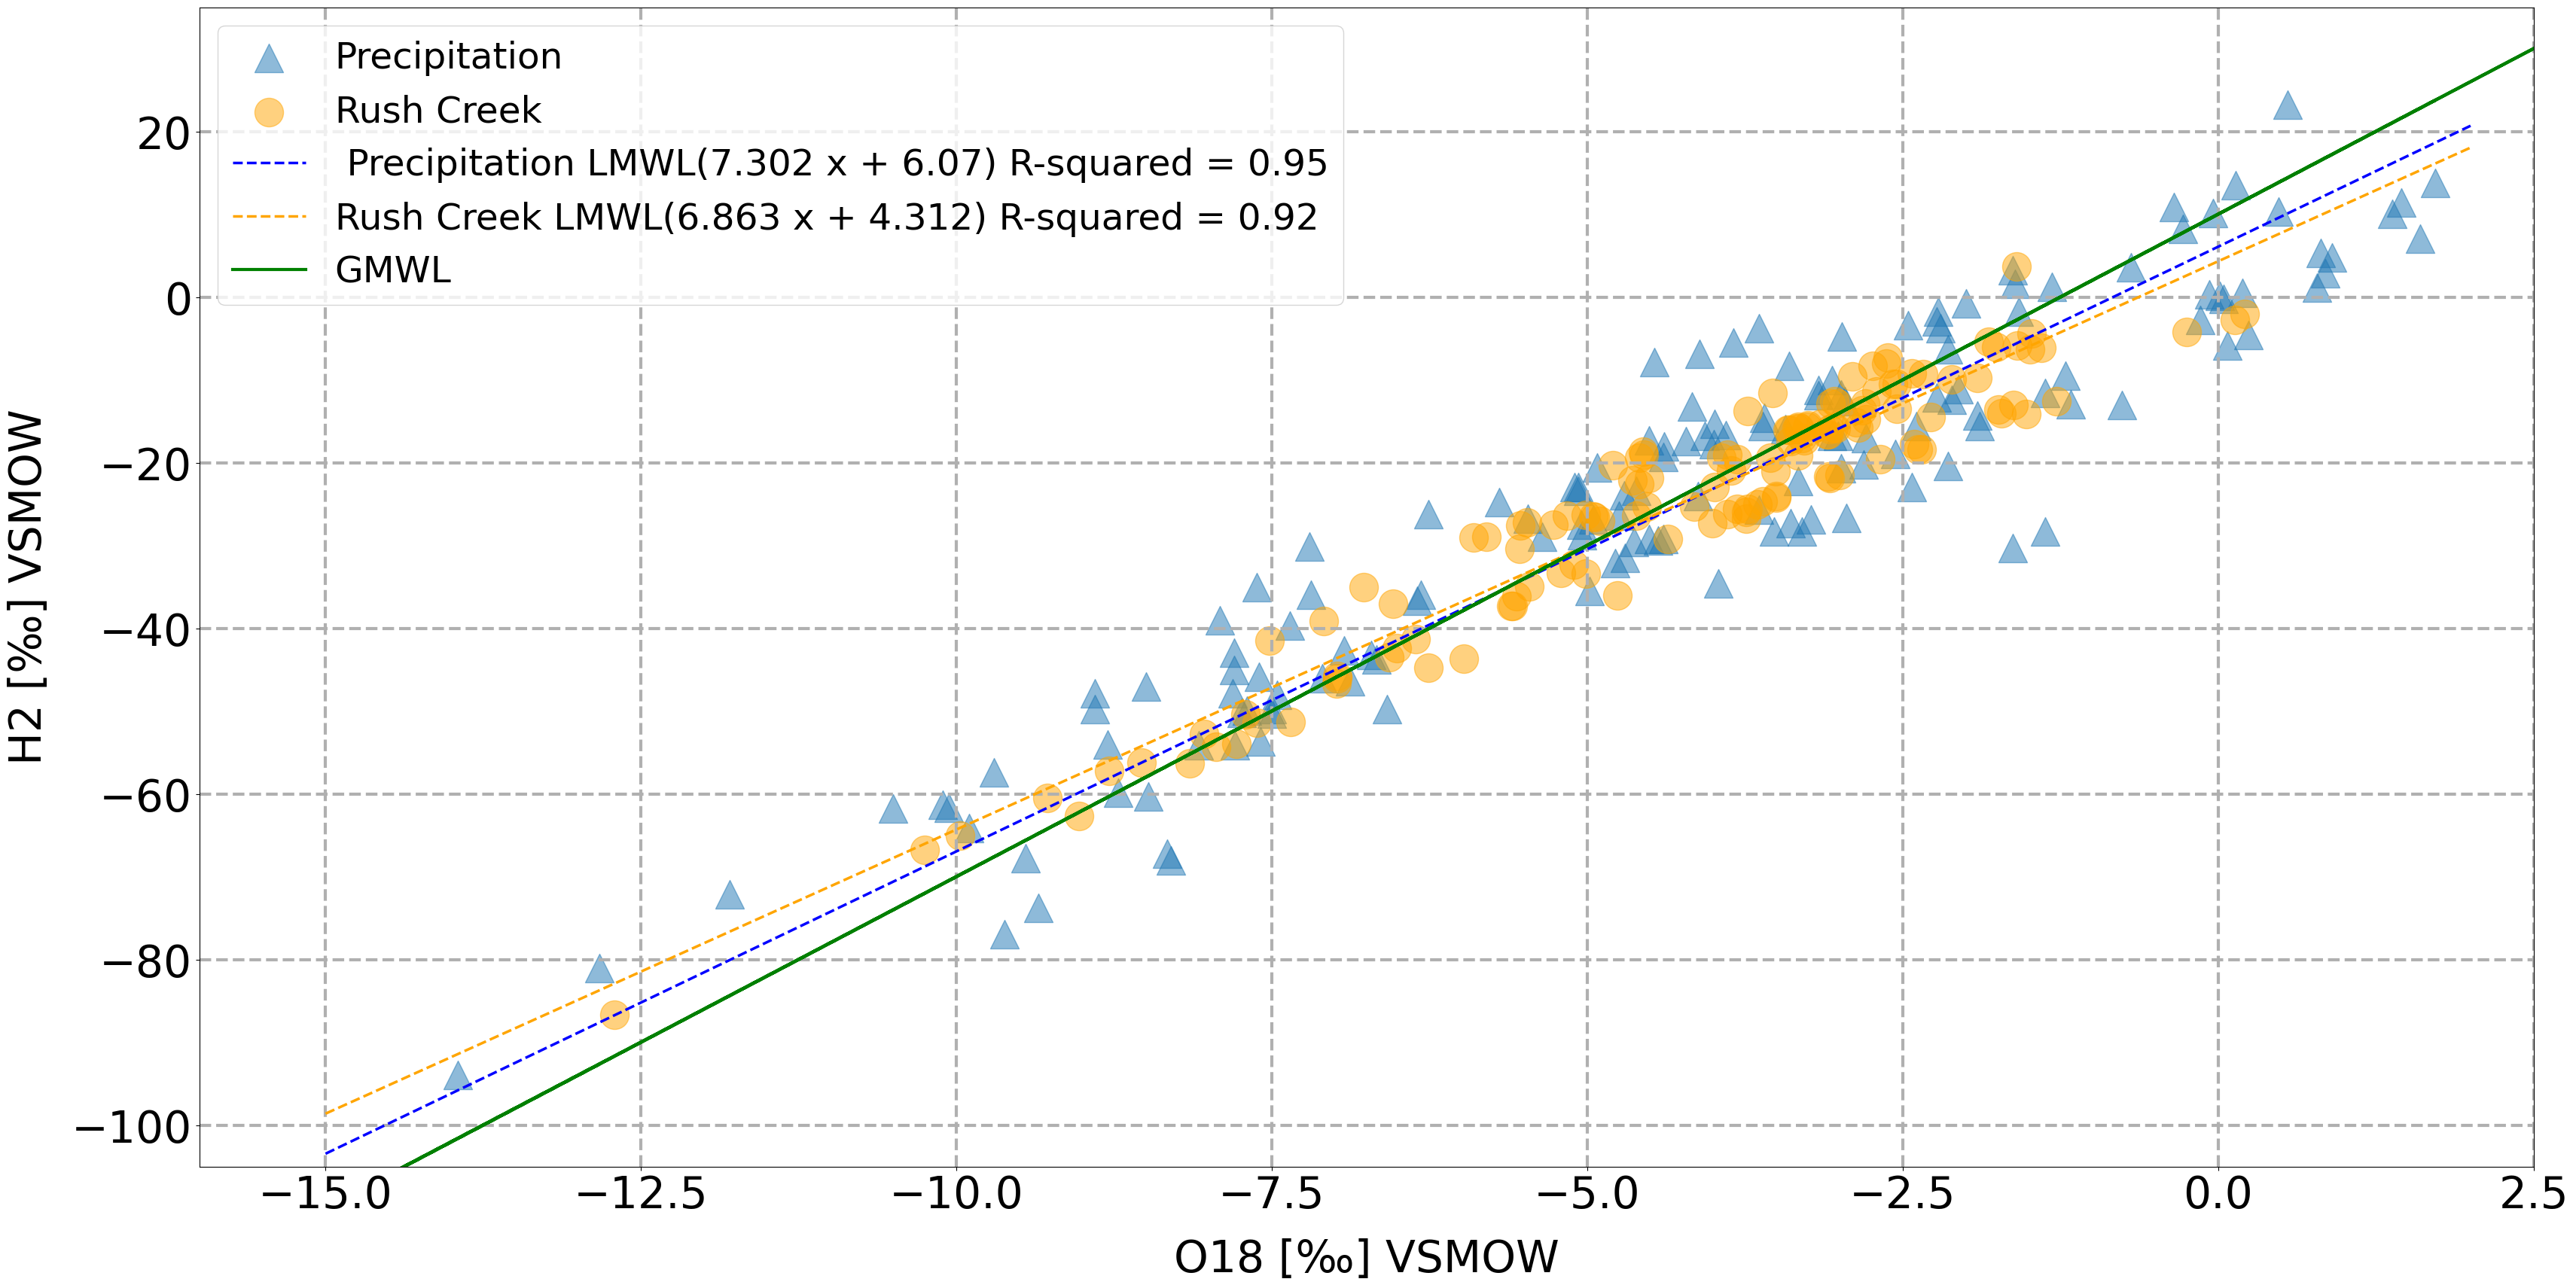

In [21]:
plt.figure(figsize=(40,20))
plt.scatter(data_precipi['18Op'],data_precipi['2Hp'],marker='^',alpha=0.5,label='Precipitation',s=750)
plt.scatter(iso_data['18ORc'],iso_data['2HRc'],marker='o',alpha=0.5,label='Rush Creek',s=750,c="orange")
#plt.scatter(iso_data['18Ogw'],iso_data['2Hgw'],marker='s',alpha=1,label='Groundwater',s=550,c="red")

plt.plot(polyline, modelp(polyline), color='blue', label= ' Precipitation LMWL(7.302 x + 6.07) R-squared = 0.95',linestyle = '--', linewidth = 2.5)
plt.plot(polyline, model1(polyline), color='orange', label= 'Rush Creek LMWL(6.863 x + 4.312) R-squared = 0.92',linestyle = '--', linewidth = 2.5)
#plt.plot(polyline, modelgw(polyline), color='red', label= ' Groundwater LMWL(7.016 x + 6.09) R-squared = 0.97',linestyle = '--')
plt.plot(iso_data['18Op'],df['GMWL'],label='GMWL',color='green',linewidth = 3)

plt.legend(loc='upper left',fontsize = 35)
plt.axis([-16,2.5,-105,35])
plt.xlabel('O18 [‰] VSMOW', fontsize = 42,labelpad = 20)
plt.ylabel('H2 [‰] VSMOW', fontsize = 42, labelpad = 20)
plt.grid( linestyle = '--', linewidth = 3)
plt.savefig('discoverLMWL_b.jpeg')
plt.show()

In [22]:
data_precipi.loc[:, 'Date'] = pd.to_datetime(data_precipi['Date'])
data_rushcreek.loc[:, 'Date3'] = pd.to_datetime(data_rushcreek['Date3'])
data_gw.loc[:, 'Date5'] = pd.to_datetime(data_gw['Date5'])
df1.loc[:, 'Date4'] = pd.to_datetime(df1['Date4'])
#data_precipi['Date'] = pd.to_datetime(data_precipi['Date'])
#data_rushcreek['Date3'] = pd.to_datetime(data_rushcreek['Date3'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/01/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/01/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/01/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/01/2022' in DD/MM/YYYY format. Provide format or specif

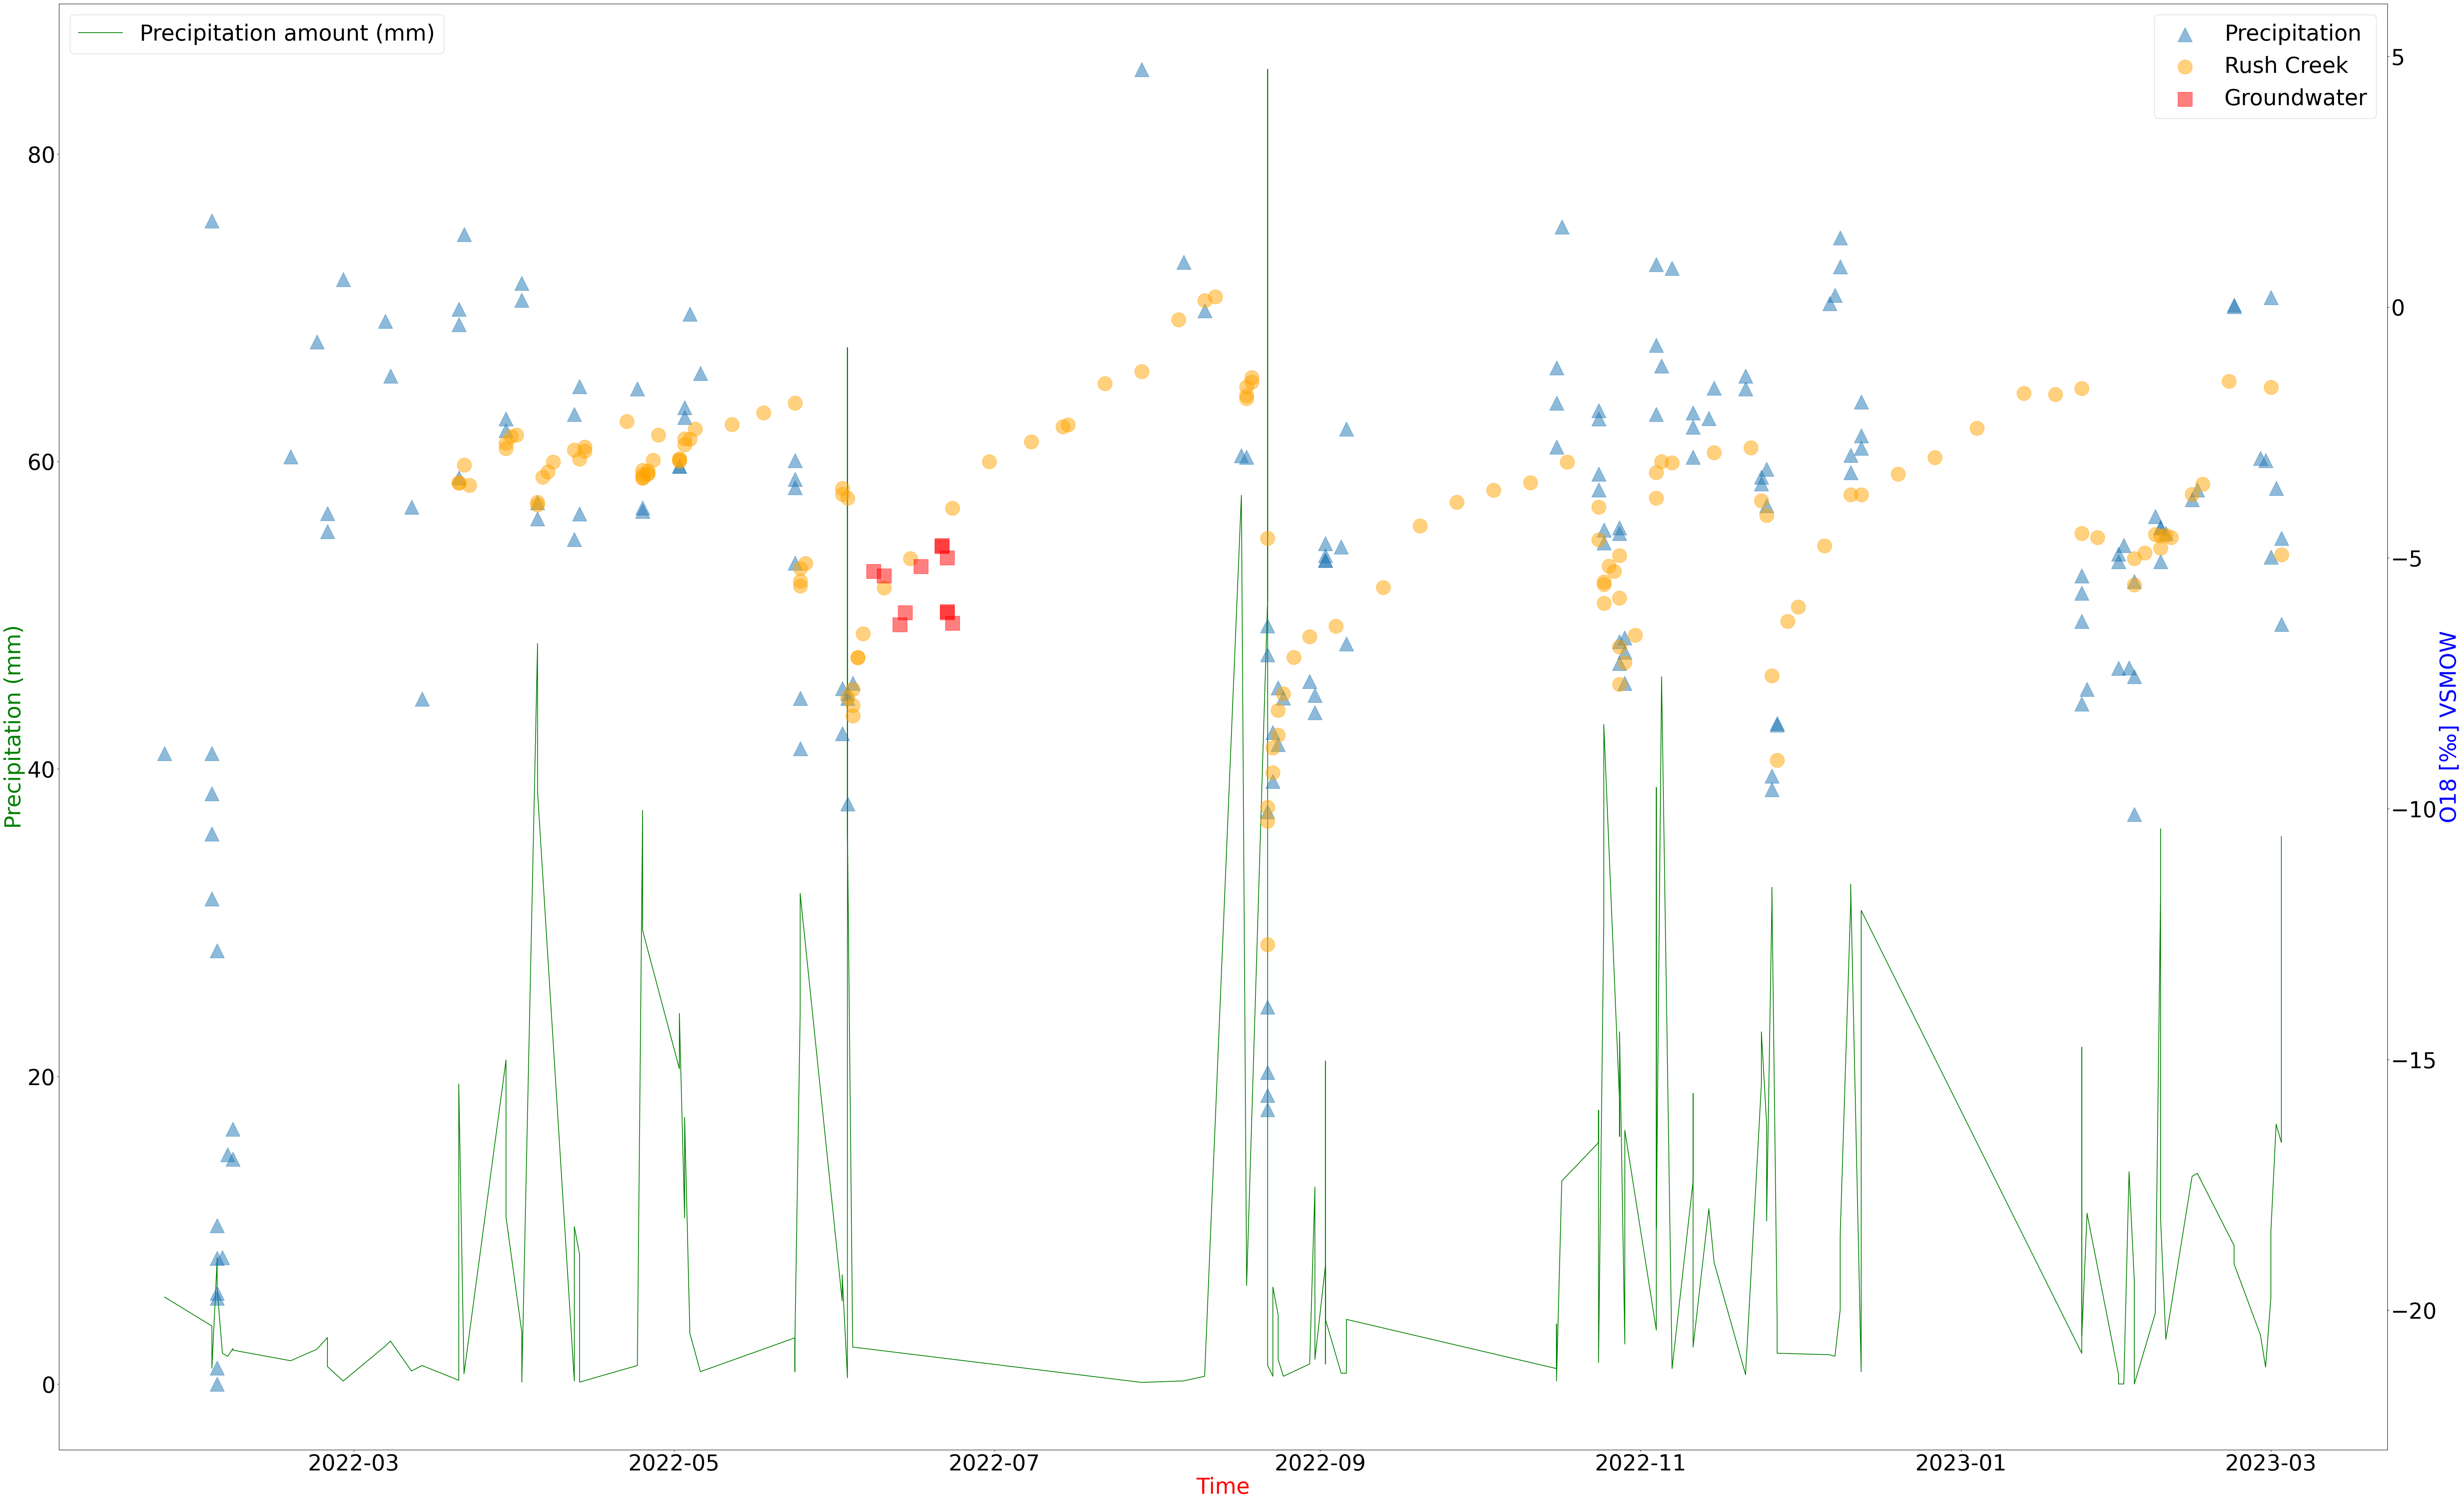

In [23]:
fig, ax = plt.subplots(figsize = (80, 50))
ax2 = ax.twinx()
ax.plot(data_precipi.loc[:, 'Date'], data_precipi['P (mm)'], color = 'g',label='Precipitation amount (mm)')
#ax.plot(df1.loc[:, 'Date4'], df1['Trinity_dicharge'], color = 'g',label='discharge')
ax2.scatter(data_precipi.loc[:, 'Date'], data_precipi['18Op'], alpha=0.5,s=750,marker='^',label='Precipitation')
ax2.scatter(data_rushcreek.loc[:, 'Date3'],data_rushcreek['18ORc'],alpha=0.5, color = 'orange',s=750, label='Rush Creek')
ax2.scatter(data_gw.loc[:, 'Date5'],data_gw['18Ogw'],alpha=0.5, color = 'red',s=750,marker='s',label='Groundwater')
ax.set_xlabel('Time', color = 'r')
ax.set_ylabel('Precipitation (mm)', color = 'g')
ax2.set_ylabel('O18 [‰] VSMOW', color = 'b')
ax2.legend()
ax.legend(loc='upper left')
plt.show()

In [24]:
dex_data=dex_data.reset_index(drop=True)
dex_data

dext  dexp  dexRc  dexgw
0     -2.17  21.1   3.80  12.29
1     -2.62  20.3   7.02  12.11
2     -3.04  23.5   9.92  10.53
3     -3.27  22.1   8.94  11.27
4     -3.28  22.1   8.87  10.33
...     ...   ...    ...    ...
36915   NaN   NaN    NaN    NaN
36916   NaN   NaN    NaN    NaN
36917   NaN   NaN    NaN    NaN
36918   NaN   NaN    NaN    NaN
36919   NaN   NaN    NaN    NaN

[36920 rows x 4 columns]

In [25]:
dex_data.describe()

dext        dexp       dexRc      dexgw
count  61.000000  163.000000  135.000000  11.000000
mean    2.742951    9.803436    9.148370  11.562727
std    10.474223    8.918093    5.019876   0.910375
min   -15.790000  -17.300000   -3.810000  10.060000
25%    -3.280000    3.500000    6.740000  10.900000
50%     1.590000   11.500000    9.320000  11.790000
75%     9.220000   15.815000   12.150000  12.225000
max    31.770000   27.900000   19.130000  12.620000

<AxesSubplot:>

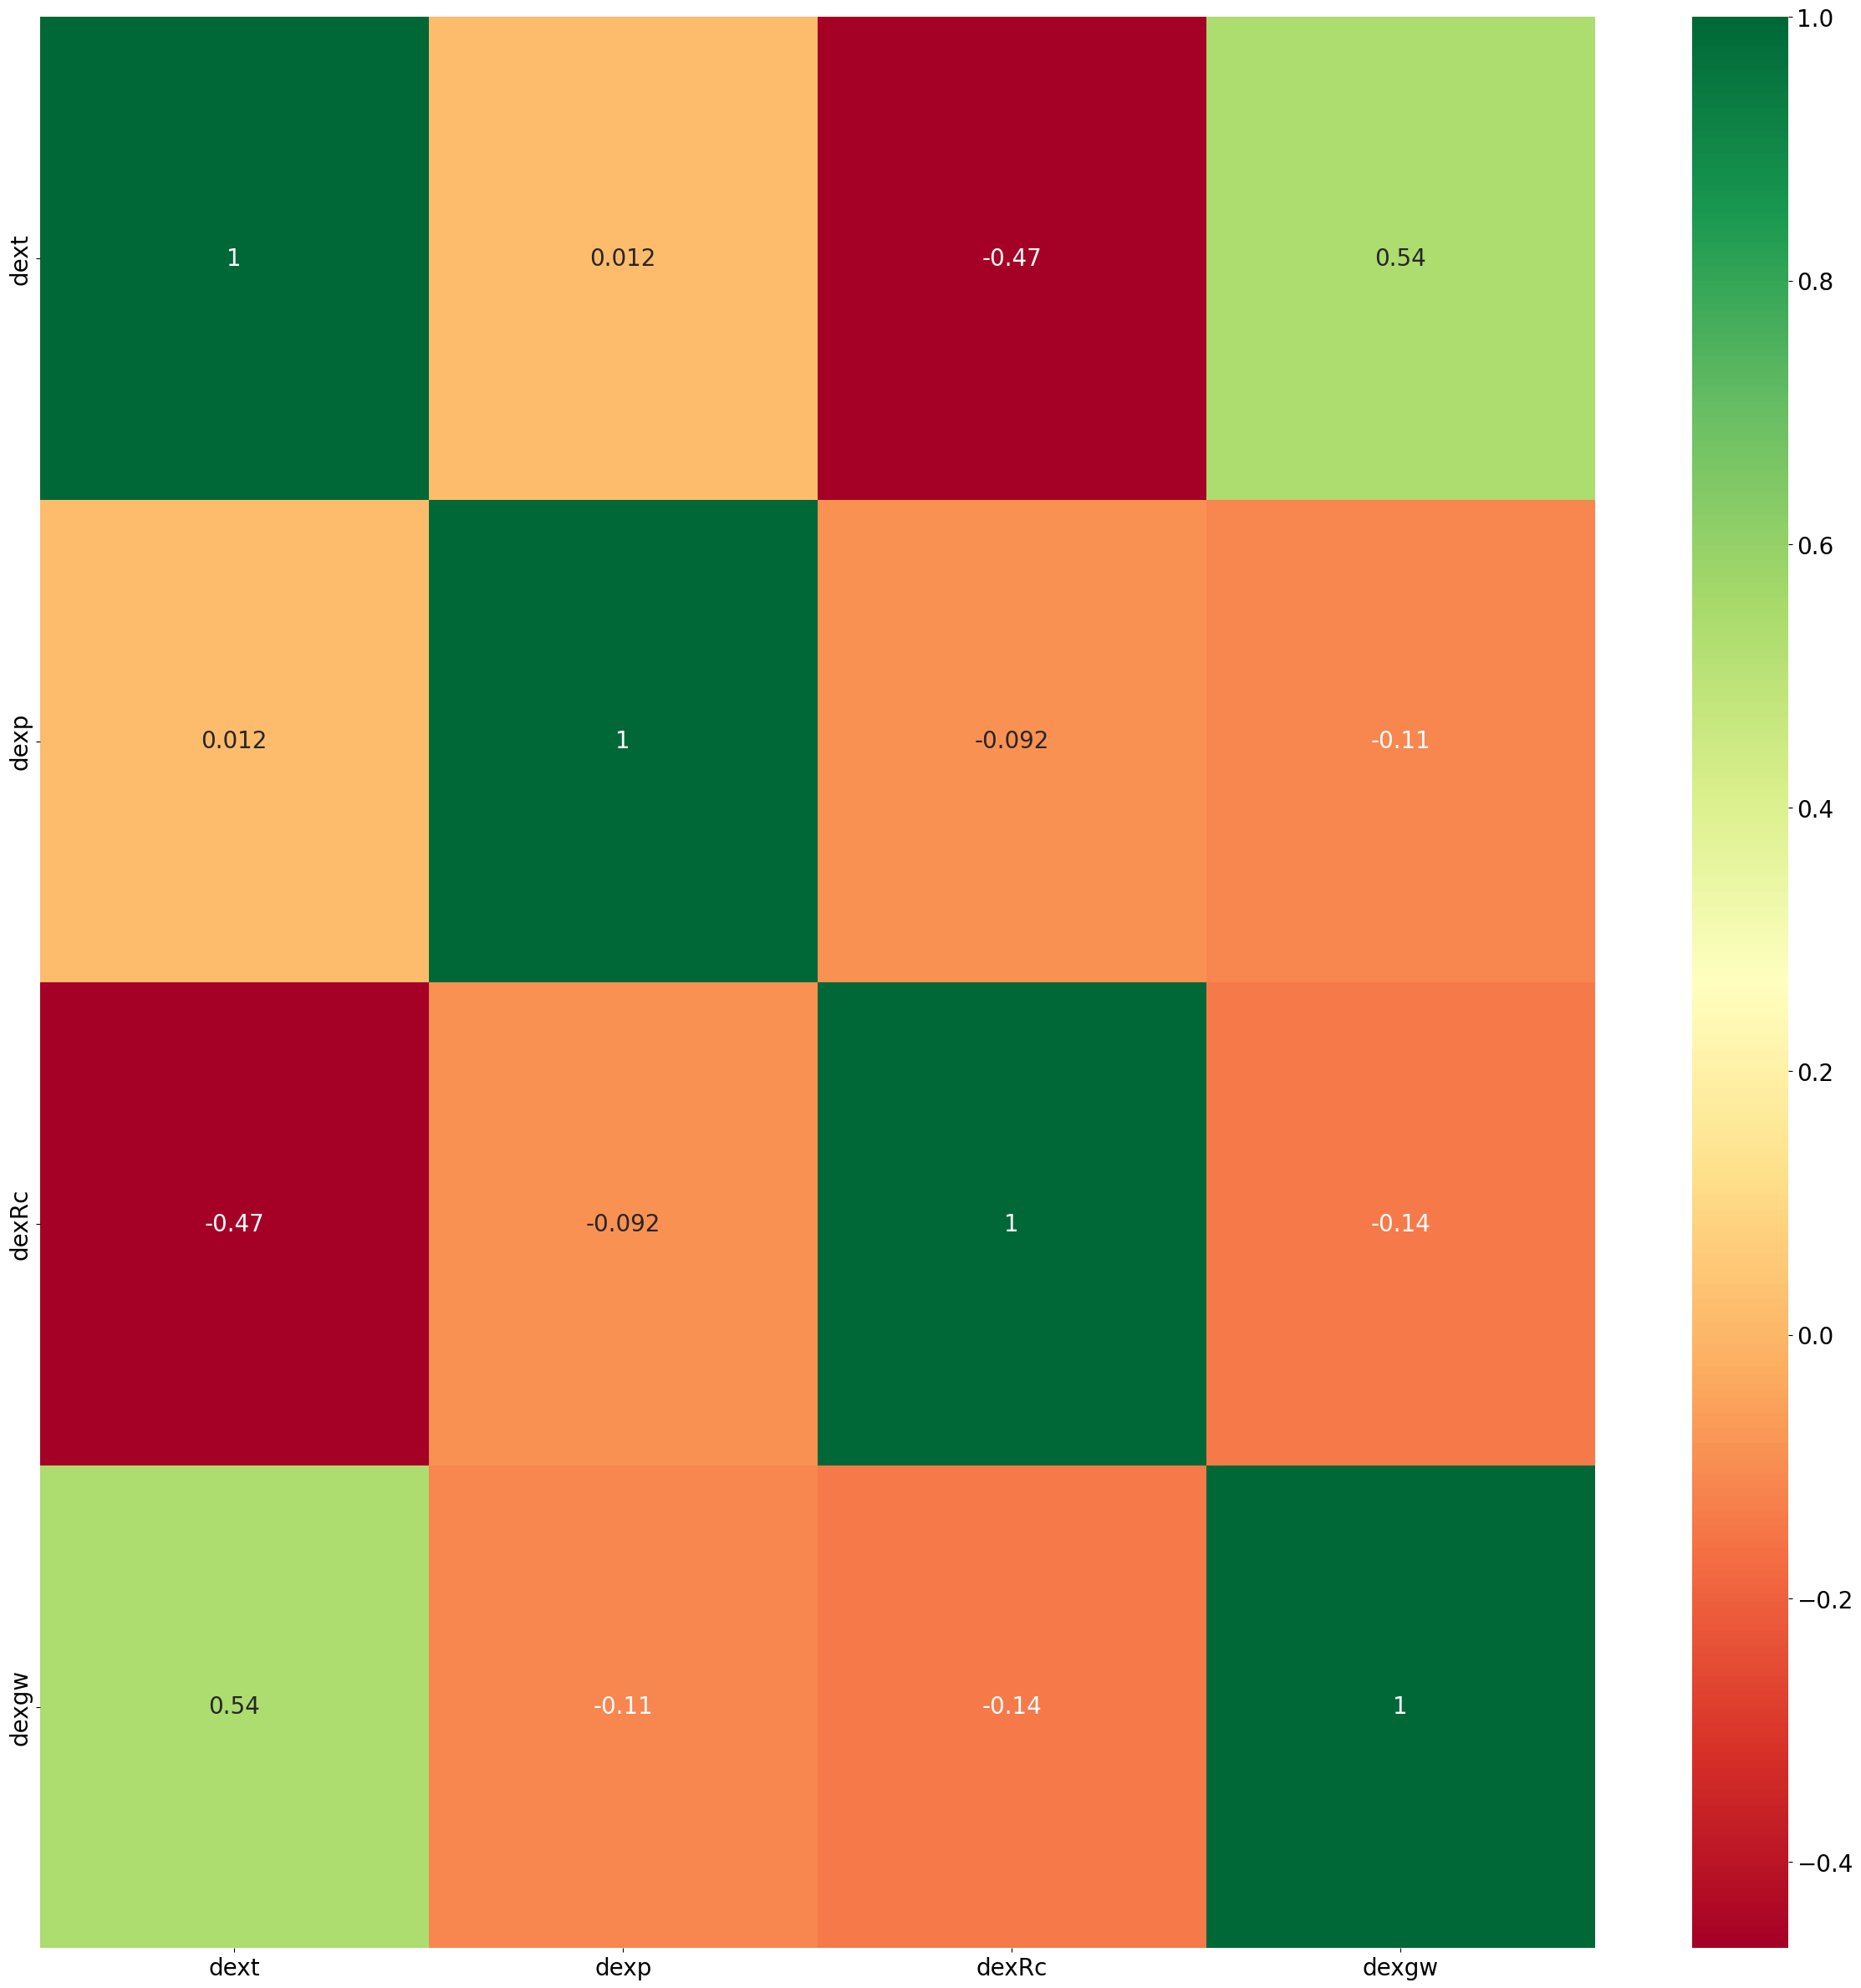

In [26]:
corre_mad = dex_data.corr()
top_corr_featuresdf = corre_mad.index
plt.figure(figsize=(30,30))
plt.rcParams['font.size'] = 20
sns.heatmap(dex_data[top_corr_featuresdf].corr(),annot=True,cmap="RdYlGn",) 

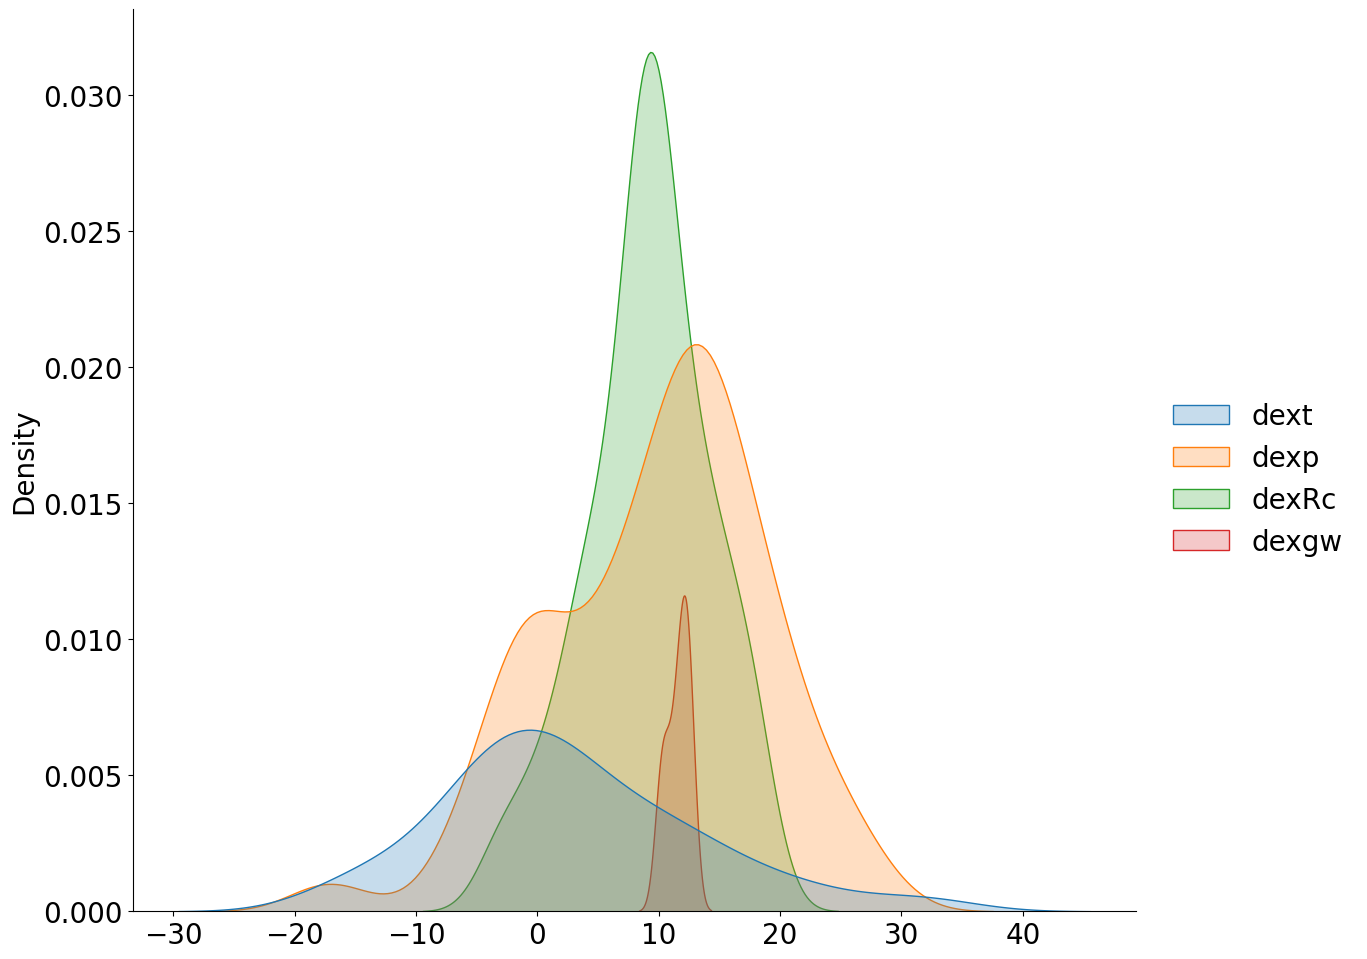

In [27]:
sns.displot(dex_data, kind="kde", height=10, aspect=1.2, fill=True)

<AxesSubplot:>

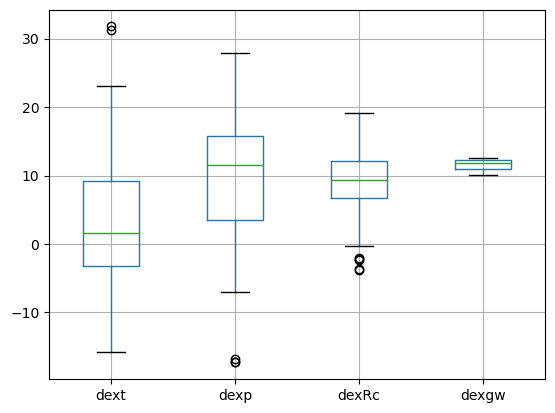

In [28]:
dex_data.boxplot(fontsize=10)


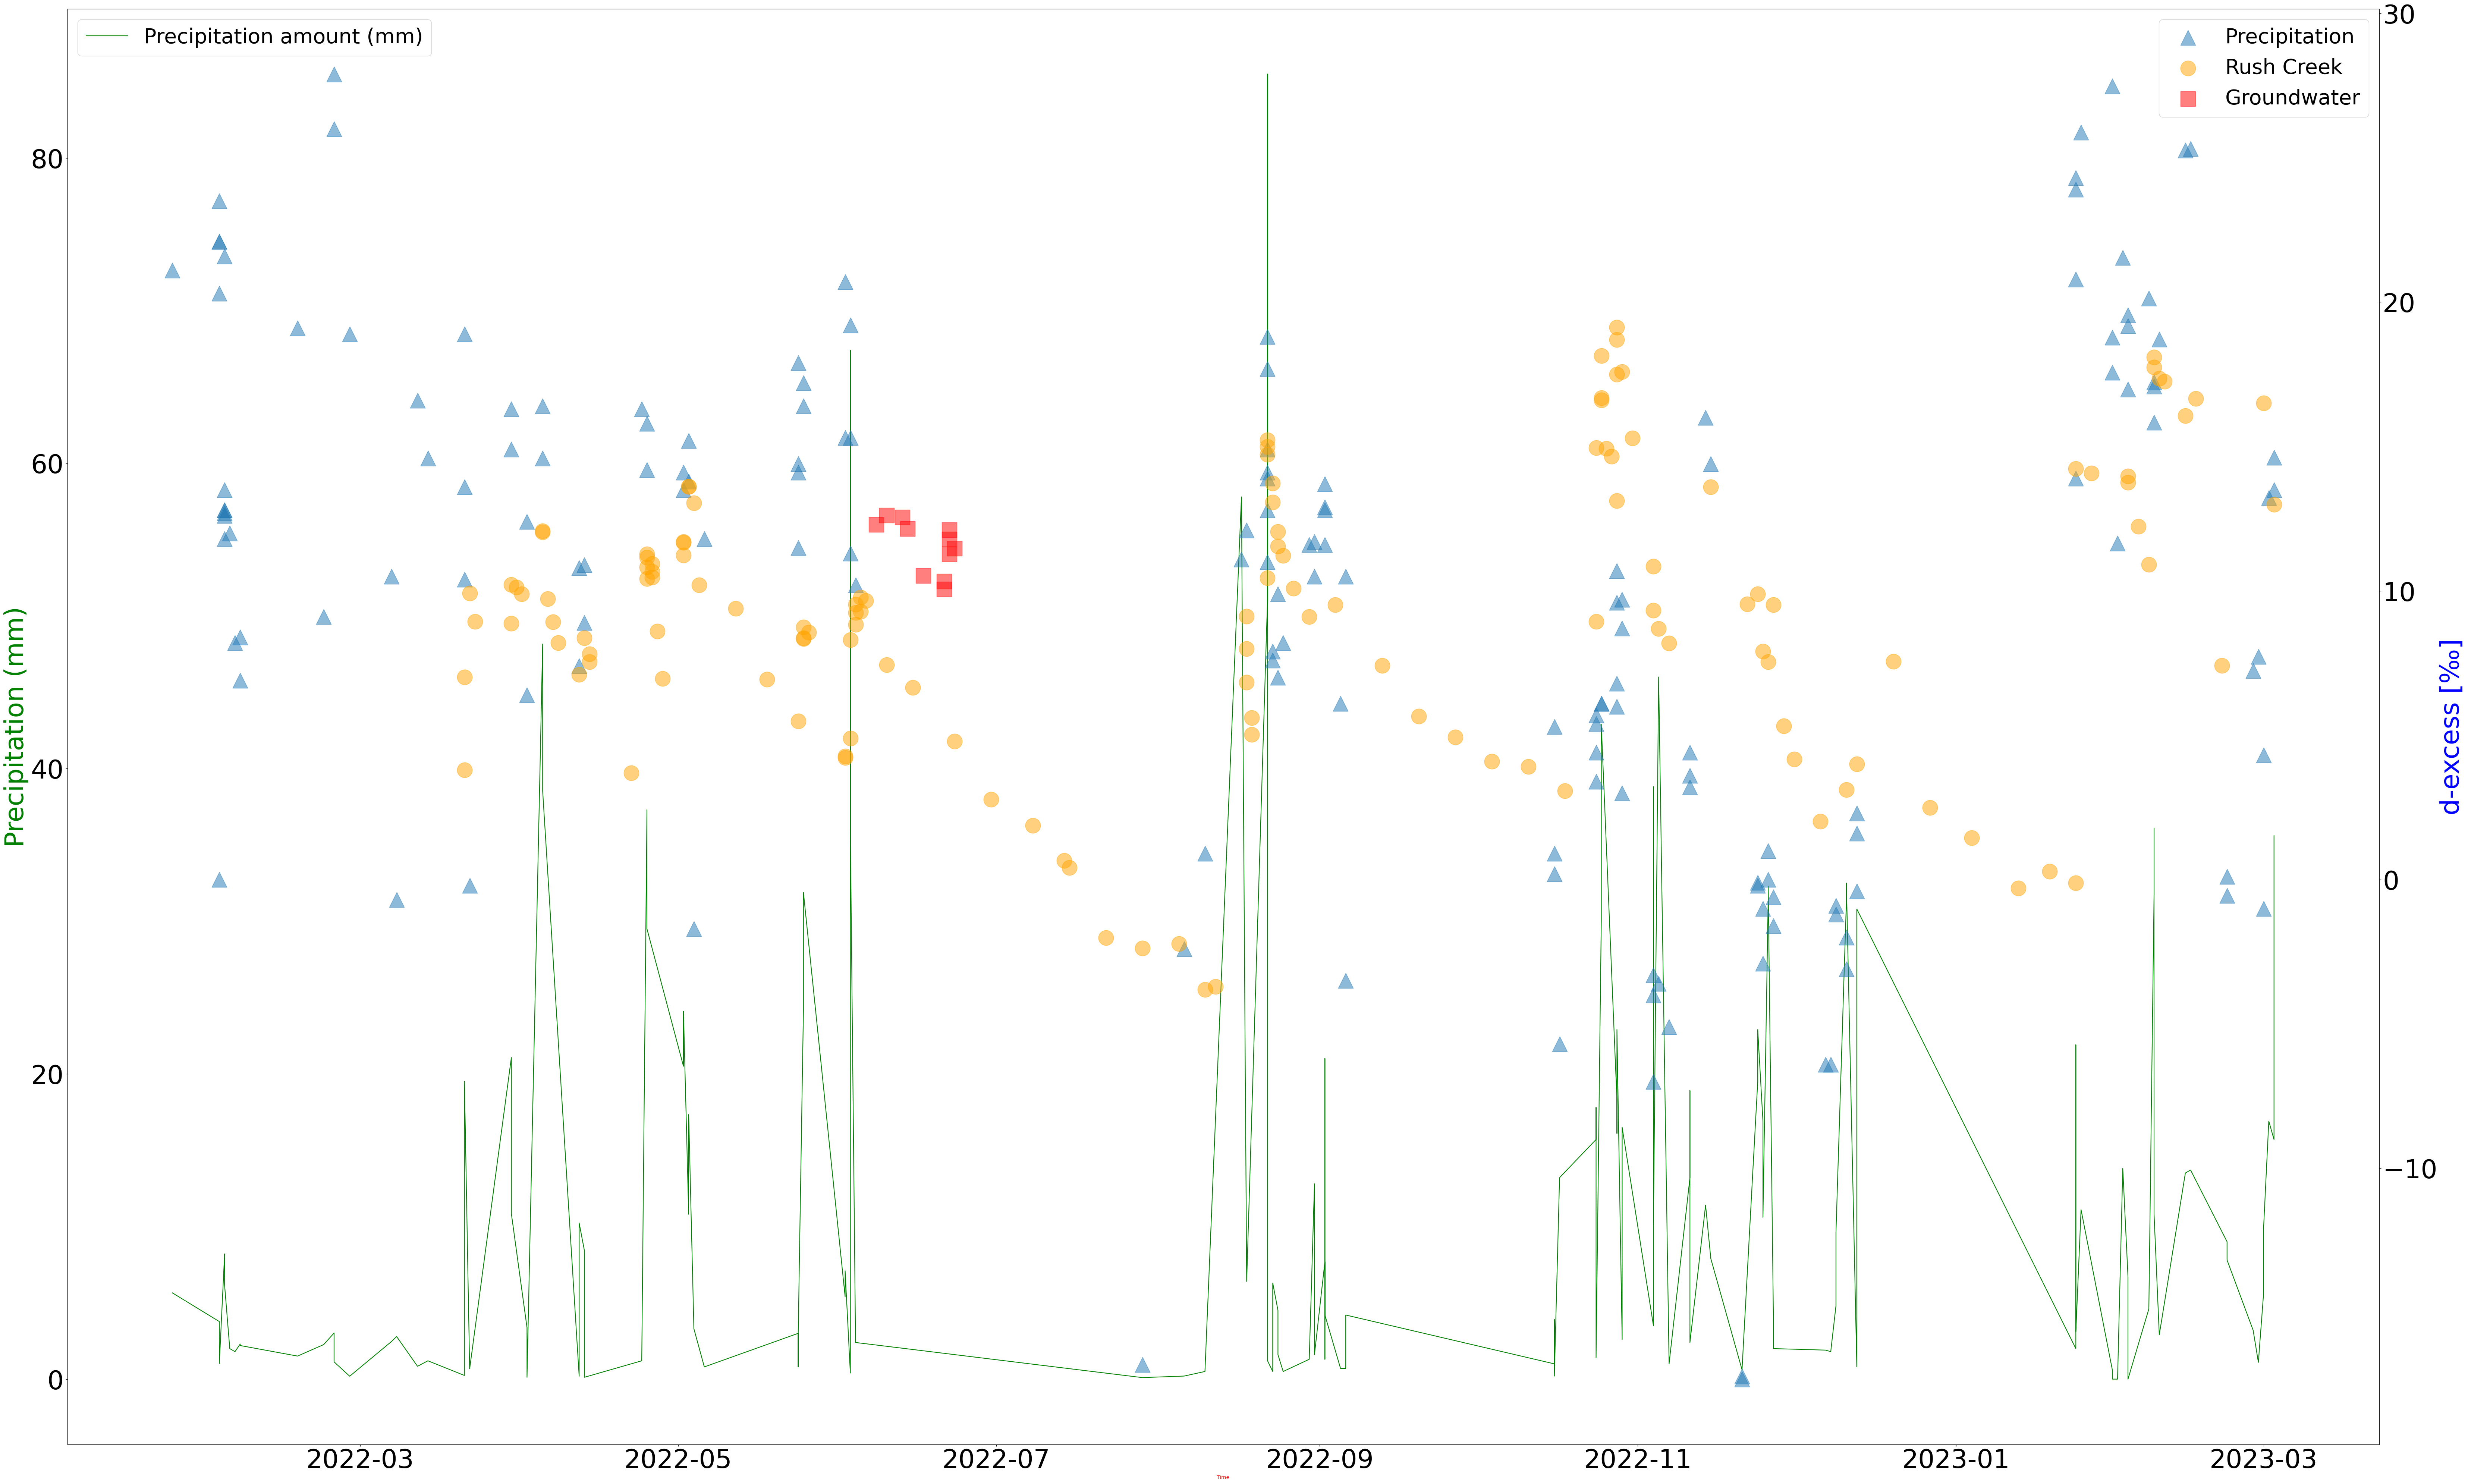

In [29]:
fig, ax = plt.subplots(figsize = (80, 50))
ax2 = ax.twinx()
ax.plot(data_precipi.loc[:, 'Date'], data_precipi['P (mm)'], color = 'g',label='Precipitation amount (mm)')
ax2.scatter(data_precipi.loc[:, 'Date'], data_precipi['dexp'], alpha=0.5,s=850,marker='^',label='Precipitation')
ax2.scatter(data_rushcreek.loc[:, 'Date3'],data_rushcreek['dexRc'],alpha=0.5, color = 'orange',s=850, label='Rush Creek')
ax2.scatter(data_gw.loc[:, 'Date5'],data_gw['dexgw'],alpha=0.5, color = 'red',s=850,marker='s',label='Groundwater')
ax.set_xlabel('Time', color = 'r',fontsize=10)
ax.set_ylabel('Precipitation (mm)', color = 'g',fontsize=50)
ax2.set_ylabel('d-excess [‰]', color = 'b',fontsize=50)
ax2.tick_params(labelsize=50)
ax.tick_params(labelsize=50)
ax2.legend(loc='upper right',prop={'size': 40},fontsize=15)
ax.legend(loc='upper left',prop={'size': 40},fontsize=15)
plt.show()

In [30]:
import datetime
import calendar
data_rushcreek['month']= pd.DatetimeIndex(data_rushcreek['Date3']).month
data_precipi['month']= pd.DatetimeIndex(data_precipi['Date']).month
data_rushcreek['month'] = data_rushcreek['month'].apply(lambda x: calendar.month_abbr[x])
data_precipi['month'] = data_precipi['month'].apply(lambda x: calendar.month_abbr[x])

In [31]:
data_precipi


Date   18Op    2Hp   dexp  P (mm) month
0   2022-01-24  -8.90 -49.80  21.10    5.65   Jan
1   2022-02-02  -9.70 -57.41  20.30    3.77   Feb
2   2022-02-02  -8.90 -47.82  23.50    3.77   Feb
3   2022-02-02 -10.50 -61.74  22.10    2.26   Feb
4   2022-02-02 -11.80 -72.16  22.10    3.39   Feb
..         ...    ...    ...    ...     ...   ...
158 2023-03-01   0.19   0.50  -1.00    5.60   Mar
159 2023-03-01  -4.98 -35.53   4.32    9.90   Mar
160 2023-03-02  -3.61 -15.63  13.22   16.90   Mar
161 2023-03-03  -6.32 -35.91  14.62   15.70   Mar
162 2023-03-03  -4.61 -23.40  13.50   35.60   Mar

[163 rows x 6 columns]

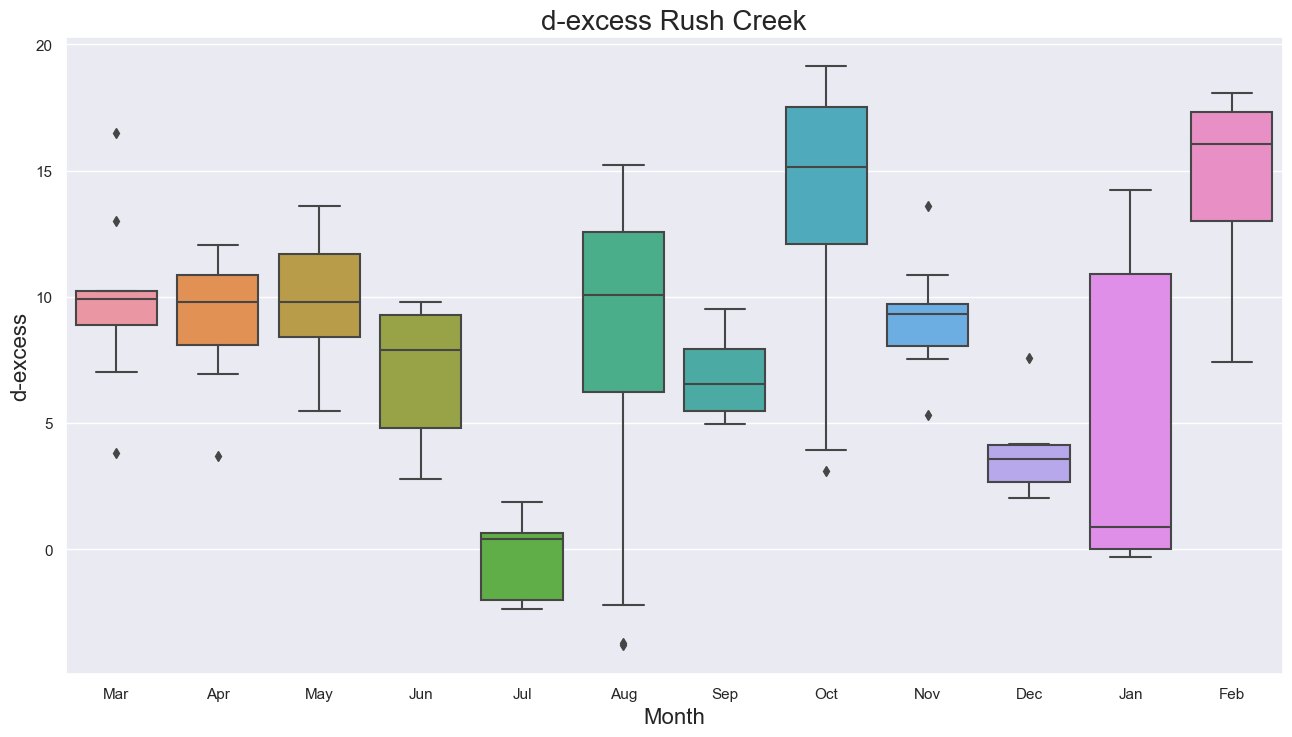

In [37]:
sns.set(style='darkgrid', rc={'figure.figsize':(15.7, 8.27)})
ax5 = sns.boxplot(x=data_rushcreek["month"], y=data_rushcreek["dexRc"])


# add labels to the x-axis and y-axis
ax5.set_xlabel('Month', fontsize=16)
ax5.set_ylabel('d-excess', fontsize=16)
ax5.set_title('d-excess Rush Creek', fontsize=20)  
fig5 = ax5.get_figure()
fig5.savefig('Rc_boxplot_dex.jpeg')  
plt.show()

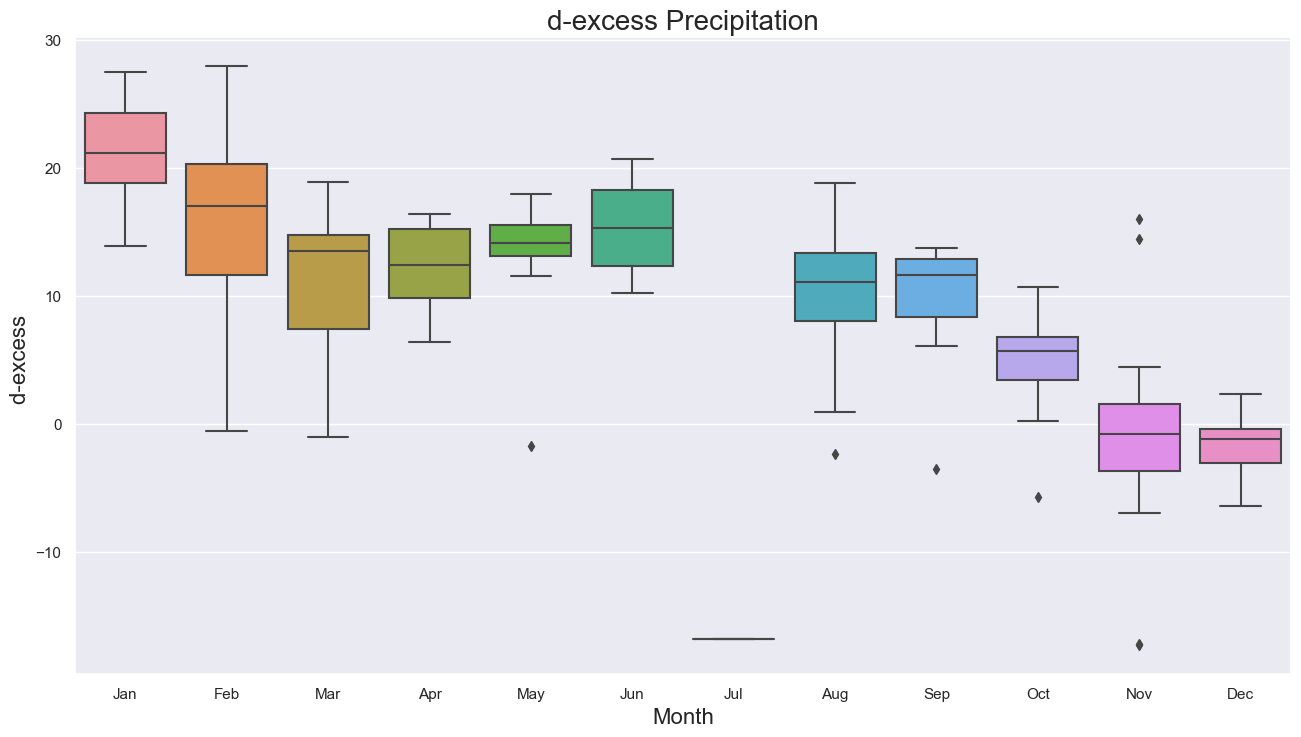

In [35]:
sns.set(style='darkgrid', rc={'figure.figsize':(15.7, 8.27)})
ax6 = sns.boxplot(x=data_precipi["month"], y=data_precipi["dexp"])


# add labels to the x-axis and y-axis
ax6.set_xlabel('Month', fontsize=16)
ax6.set_ylabel('d-excess ', fontsize=16)
ax6.set_title('d-excess Precipitation', fontsize=20)
ax6.savefig('discoverLMWL_b.jpeg')  
    
plt.show()